# **WallMart Predective Model**

# **Introduction**

Walmart is an American multinational retail corporation that operates a chain of discount department stores, hypermarkets, and grocery stores in the United States and 23 other countries. It is one of the world's largest brick-and-mortar retailers and one of the fastest growing e-commerce organizations. Walmart's business strategy is based on the late 19th century five-and-dime retail model, but it also includes operational efficiency, technological approaches, and competitiveness.



---



# **Objective of the Project**

A retail store(Walmart) that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. So, we have to use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.



---



# **Feature Description**

---



**1. Store** : A store number is a unique identifier for a retail store.
               It can be used to identify a store in a chain, or to differentiate one store from another.

**2. Date** : week of sales.

**3. Weekly_Sales** : A week of sales is the total revenue earned from    
                      selling goods or services within a week. It includes all income from transactions made during that week.

**4. Holiday_Flag** : If it is a holiday week

**5. Temperature**  : Temperature on the day of the sale

**6. Fuel_Price** : Cost of the fuel in the region

**7. Consumer price index** : A measure of how much the prices of goods
                            and services have changed over time.

---

#  **2. Fetching Data**

##  **2.1 Importing  libraries**


In [1]:
# Mathematical operation
import numpy as np     # Numerical Python

# Data Manipulation
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing library to extract seasonality, trend and residue
import statsmodels.tsa as sm

# Libraries consisting statistical tests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Libraries consisting time-series forecasting models
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Importing metrics
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Import and execute method for suppressing warnings

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

## **2.2 Importing the Data-Set**


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Capstion project wallmart/Walmart.csv')

In [3]:
# Check the data.

data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Checking the datatype.

data.dtypes

,0
Store,int64
Date,object
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [6]:
# Checking the NAN value in the dataset

data.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [7]:
# Checking the duplicate value in the dataset

data.duplicated().sum()

0

In [8]:
# Check the statistical data.

data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# **3. Summary**

## **3.1 Summary statistics for numeric attribute**

In [9]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Summary of attributes explain's following things:



---



**For Store**

1. The total sales across different store numbers is 6,435.
2. On average, there are 23 stores in operation..
3. The store count ranges from a minimum of 1 to a maximum of 45 unique stores.


**Weekly_Sales**

1. The average weekly sales across stores are approximately $1.05 million.

2. The lowest recorded sales were around $210,000, which could indicate an underperforming week or store.

3. The highest recorded sales were $3.82 million, likely due to seasonal spikes (e.g., holidays, promotions).

**Holiday Falg**

1. The holiday flag is represented by 0 and 1, where 0 indicates no holiday, and 1 signifies a holiday.
2. When there is no holiday, the average sales reach approximately 1,046,965.
3. The minimum recorded average sales amount to 209,986.

**Temperature**

1. The average temperature is recorded at 60°C, which affects the weekly sales. Additionally, the minimum temperature drops to -2°C, leading to a slight decrease in sales.

* 25% quantile means 25% of the data is below 47°C.
* 75% quantile means 75% of the data is below 74°C.
* The total sales range between 553,350 and 1,420,159. This indicates that the sales fluctuate within this range, with a minimum of 553,350 and a maximum of 1,420,159.

**Fuel Price**

1. The minimum fuel price of 2.472 per gallon is approximately 0.65 per liter, and the maximum fuel price of 4.468 per gallon is approximately 1.18 per liter.

2. The minimum weekly sales are 209,986, and the maximum weekly sales are 3,818,686. Despite the increase in fuel prices, it appears that the sales are not significantly affected. This suggests that the stores are likely located close to customers' homes, minimizing the impact of fuel price fluctuations on sales.


**CPI(Consumer price index)**

1. **The minimum CPI of 126.064** means that, at its lowest, the cost of goods and services has increased by about 26.1% compared to the base year

2. **The maximum CPI of 227.232807** means that, at its highest, the cost of goods and services has increased by about 127.2% compared to the base year.

3. So, the increase in CPI is approximately 101.17 points.


**Unemployment**

1. An average unemployment rate of 7.999151 means that, on average, about 8% of the working-age population is unemployed.

2. The 25% quantile (6.89%) means that 25% of the population has an unemployment rate lower than 6.89%. This represents a lower range of unemployment

3. The 75% quantile (14.31%) means that 75% of the population has an unemployment rate lower than 14.31%. This shows the upper range of the unemployment distribution



---



# **Exploratory Data Analysis**

In [10]:
num_cols = [x for x in data.columns if data[x].dtypes != 'object']

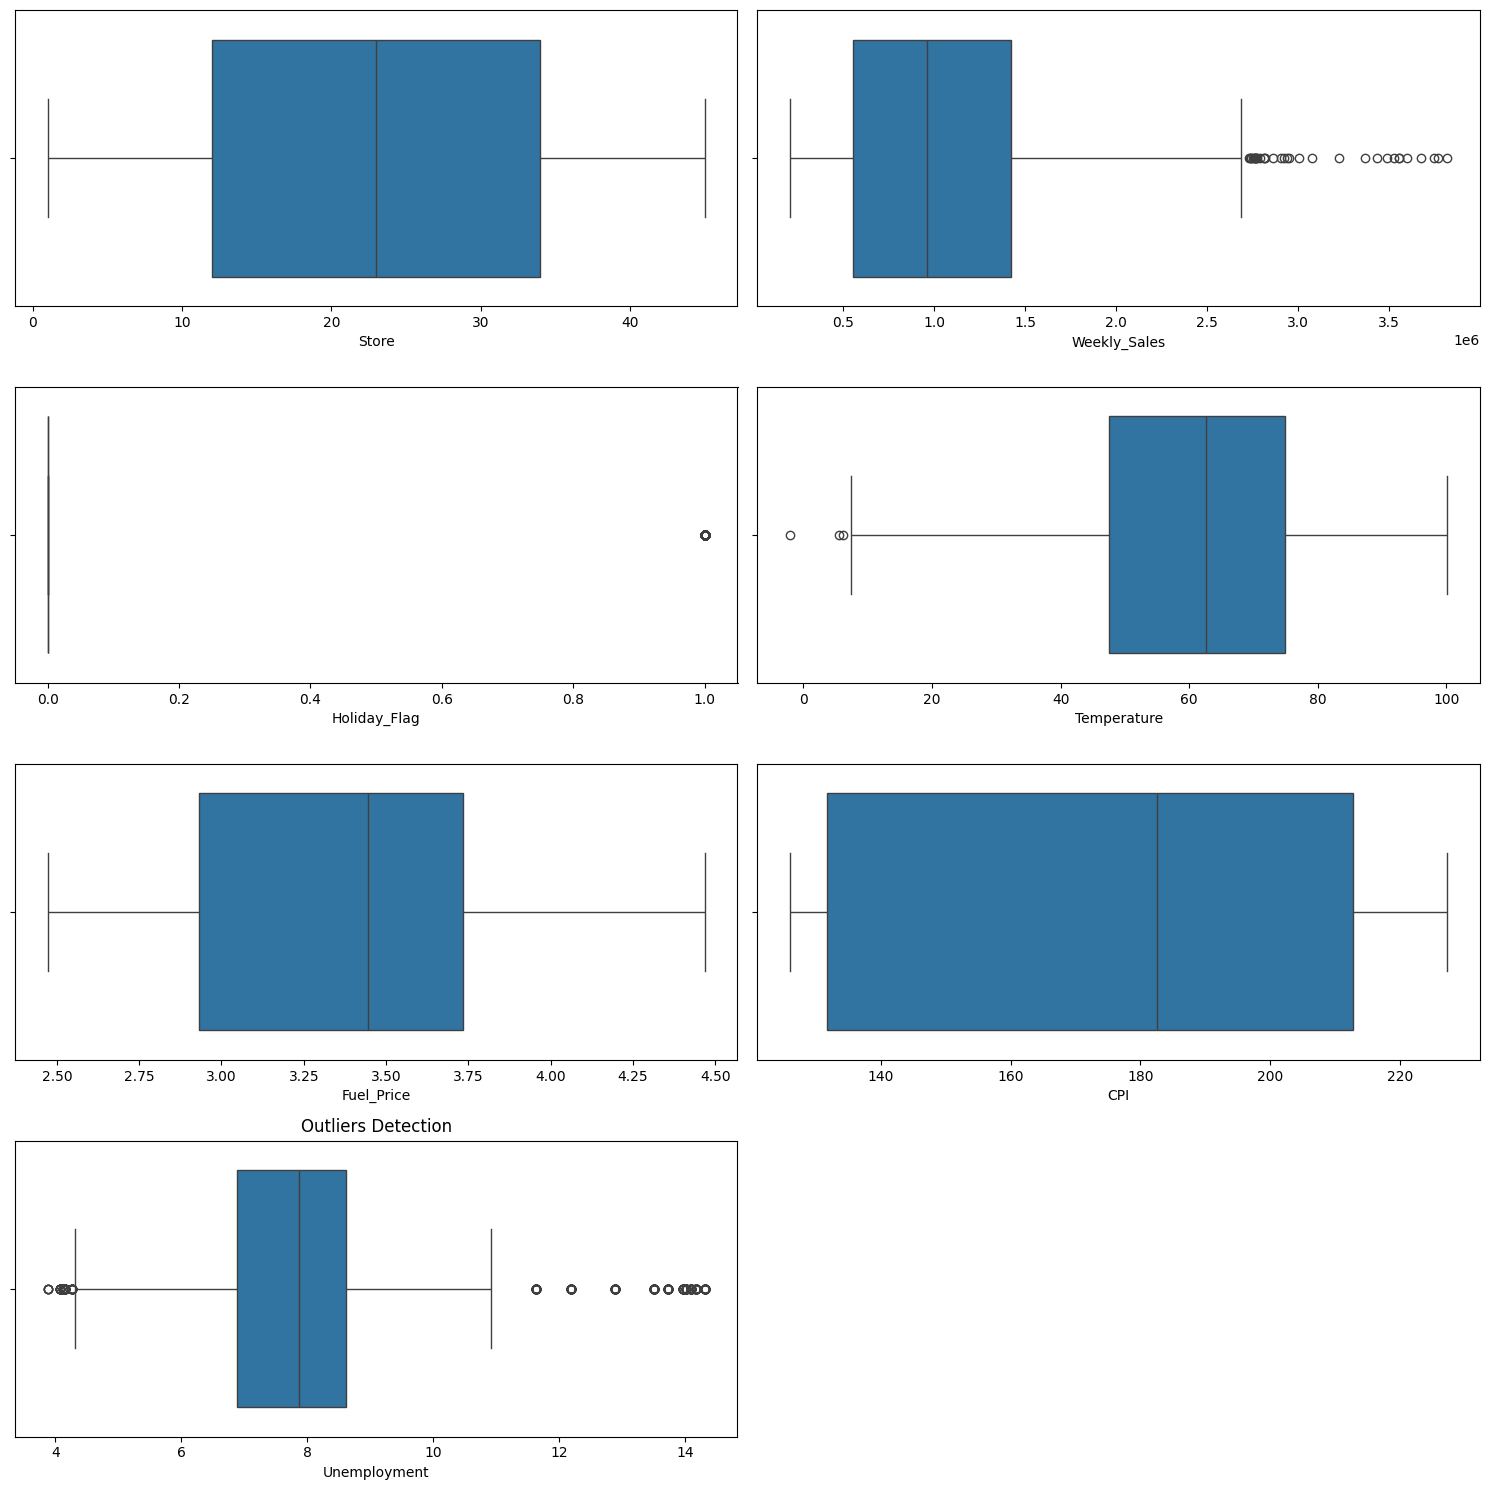

In [11]:
plt.figure(figsize=(15, 15))
for i,col in enumerate(num_cols, start = 0):
  plt.subplot(4, 2, i+1)
  sns.boxplot(x = data[col])
  plt.xlabel(col)

plt.title('Outliers Detection')
plt.tight_layout()
plt.show()

In [12]:
outliers_columns = ['Weekly_Sales', 'Temperature', 'Unemployment']

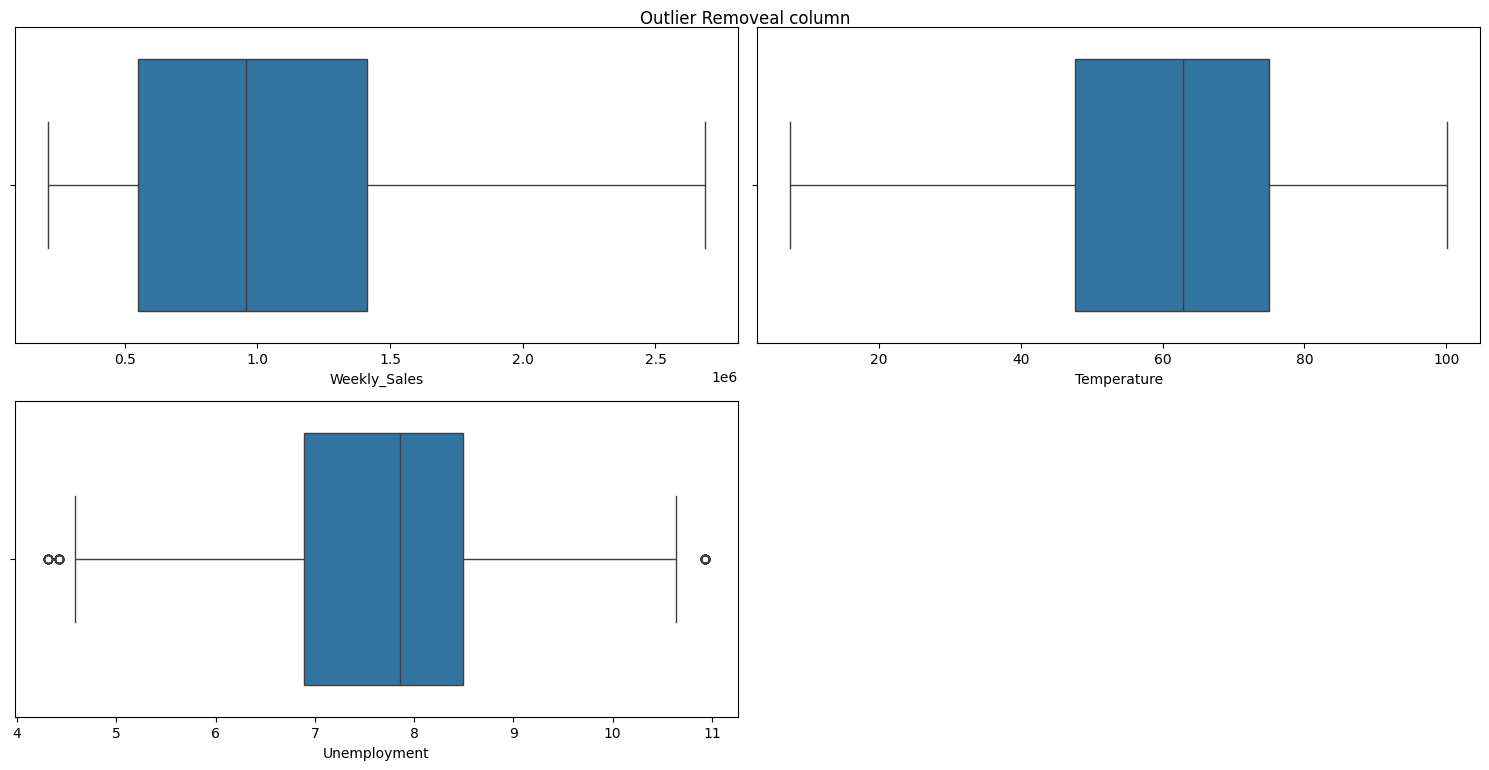

In [13]:
plt.figure(figsize=(15, 15))

for i,col in enumerate(outliers_columns, start=0):

  # Handling Outilers

  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)

  IQR = q3 - q1

  lower_bound = q1 - (1.5 * IQR)
  upper_bound = q3 + (1.5 * IQR)

  data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

  # plot Outlier Removal Data.

  plt.subplot(4, 2, i+1)
  sns.boxplot(x = data[col])
  plt.xlabel(col)


plt.suptitle('Outlier Removeal column')
plt.tight_layout()
plt.show()




In [14]:
# Converting date to Date time format.

data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')

# **4.1 Univariate - Analysis**

## **4.1.1 Holiday Flag**

### **i. Distribution**

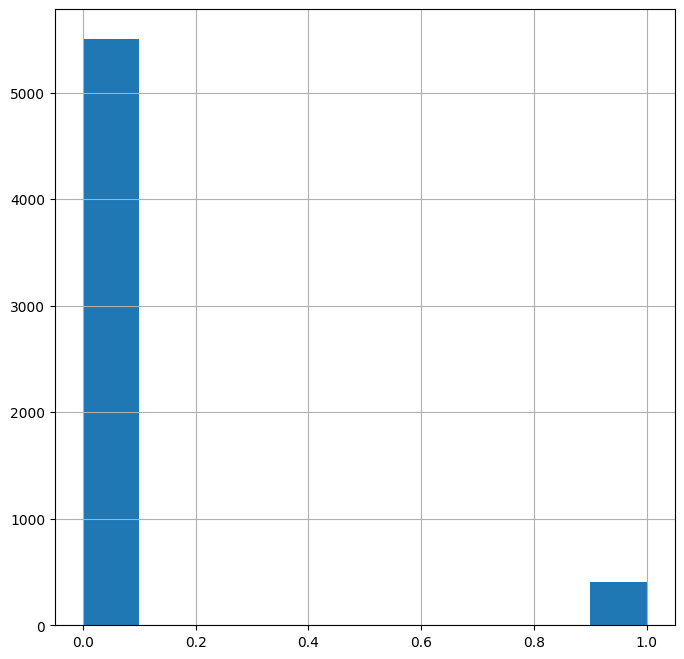

In [15]:
data['Holiday_Flag'].hist(figsize=(8, 8))
plt.show()

### **ii. Description about Distribution**

The above hsitogram show's

* The x-axis likely represents whether a day is a holiday 1 or not 0.

* The majority of the values are at 0, meaning most days in the dataset are non-holidays.

* A much smaller count is at 1, indicating a limited number of holidays in the dataset.

# **4.1.2 Store**

## **i. Distribution**

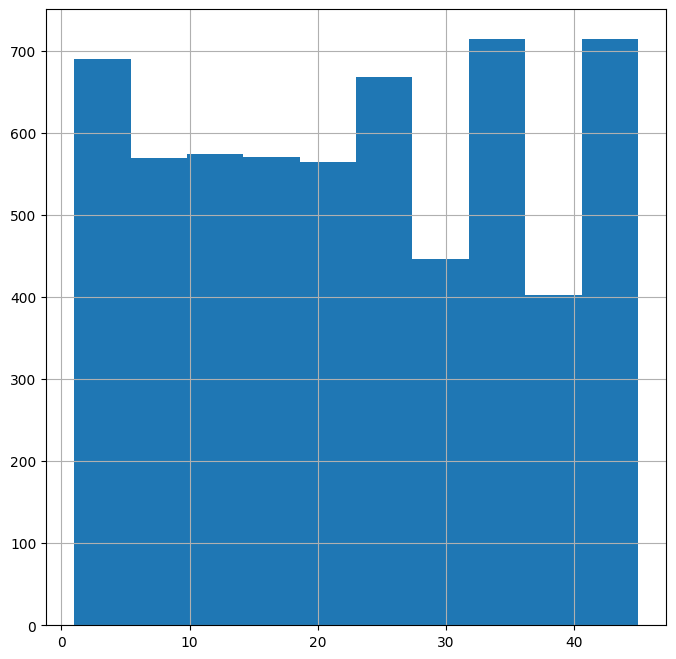

In [16]:
data['Store'].hist(figsize=(8, 8))
plt.show()

### **ii. Description about Distribution**

The above hsitogram show's

* The store is 'normally distributed' across x-axis.
* The repeating pattern suggests that some stores have similar characteristics (e.g., similar sales or revenue).
*  some stores might be performing at consistent levels across different regions.
* the peaks might correspond to high-performing stores, while the lower points could be smaller or less active stores.




# **4.1.3 Weekly Sales**

## **i. Distribution**

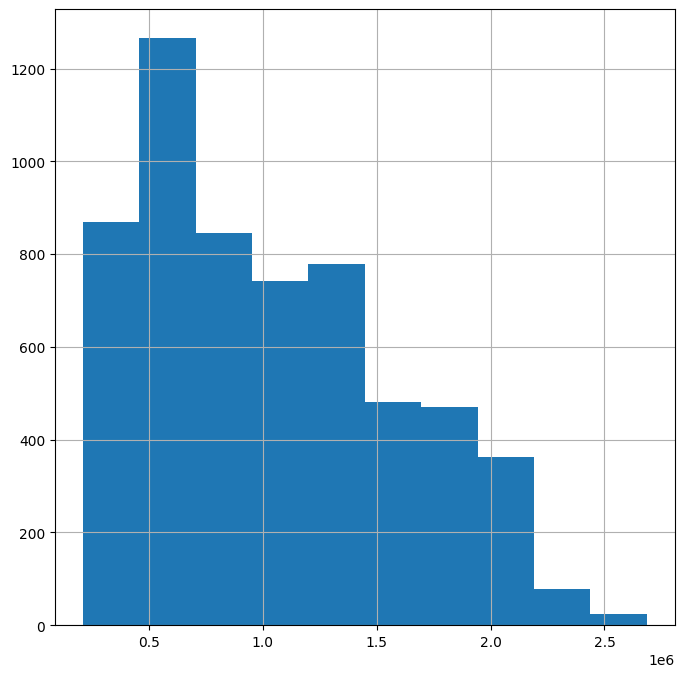

In [17]:
data['Weekly_Sales'].hist(figsize=(8, 8))
plt.show()

### **ii. Description about Distribution**

The above hsitogram show's

* The data is heavily right-skewed, meaning most stores have lower weekly sales, while fewer stores have very high sales

* The majority of the stores have sales concentrated in the lower range (left side of the histogram).

* Only a few stores generate very high weekly sales, which are shown on the right side of the histogram.

* The highest frequency  appears to be below $1.5 million in weekly sales.

* There are significantly fewer stores making above $2 million per week.





# **4.1.4 Temperature**

## **i. Distribution**

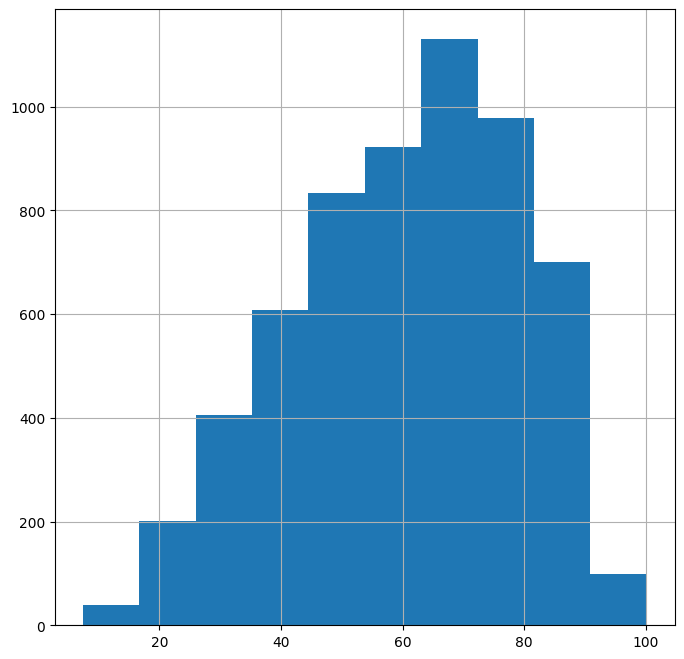

In [18]:
data['Temperature'].hist(figsize=(8, 8))
plt.show()

### **ii. Description about Distribution**

The above hsitogram show's

* The data follows an approximately bell-shaped curve.

* Most temperature values are concentrated in the 40 to 80-degree range, with fewer values at the extremes.

* The highest frequency occurs between 60 and 80 degrees, suggesting that these temperatures are the most common.

* There are very few occurrences of temperatures near 0 or above 100 degrees, indicating that extreme temperatures are rare in this dataset.





# **4.1.5 Fuel Price**

## **i. Distribution**

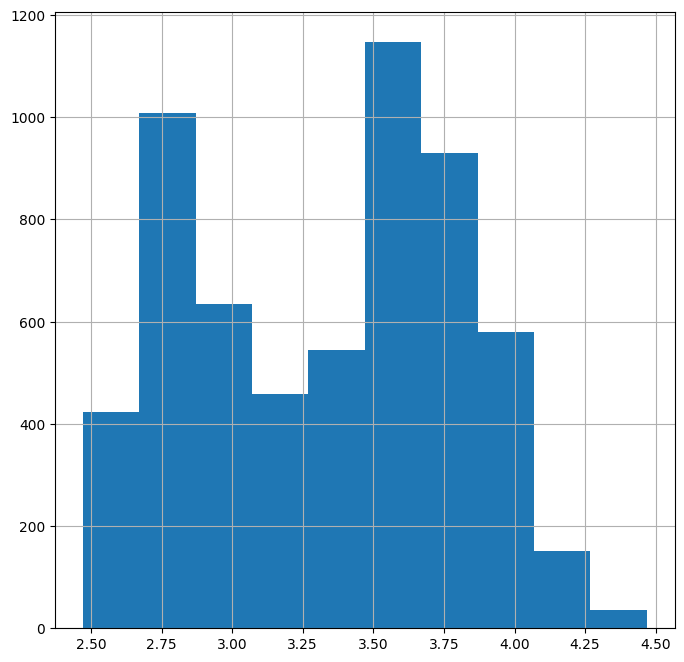

In [19]:
data['Fuel_Price'].hist(figsize=(8, 8))
plt.show()

### **ii. Description about Distribution**

The above hsitogram show's

* The histogram shows two distinct peaks, indicating a bimodal distribution.

* One peak is around $2.75-$3.00, and another peak is near $3.50-$4.00.

* This suggests that fuel prices fluctuate between these two ranges, possibly due to different time periods, regions, or market conditions.

* The spread indicates moderate variability in fuel prices over the observed period.





# **4.1.5 CPI**

## **i. Distribution**

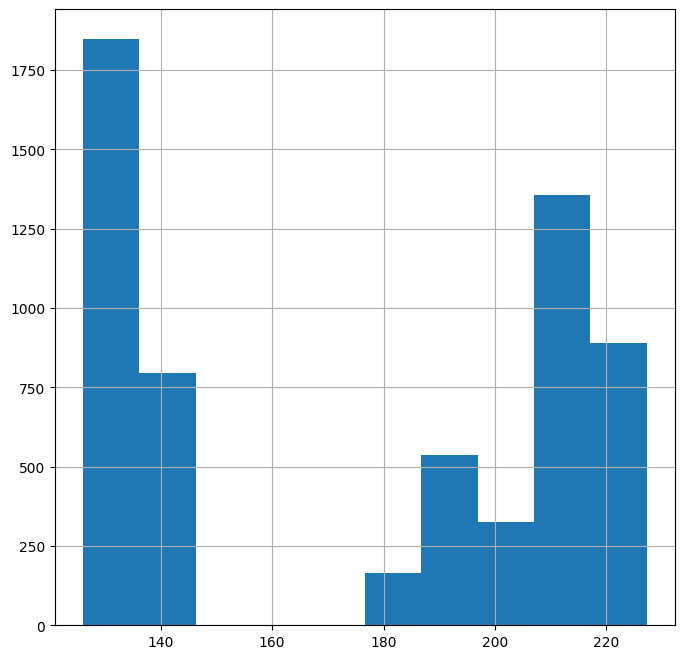

In [20]:
data['CPI'].hist(figsize=(8, 8))
plt.show()

### **ii. Description about Distribution**

The above hsitogram show's

* The histogram shows two distinct peaks, meaning there are two main groups of CPI values.

* The CPI values range from 130 to 225.

* One cluster is around 130-145, while the other is near 190-225.

* This suggests that the data spans different time periods or economic conditions.

* The lower CPI values (~130-145) could represent an earlier time period when prices were lower.

* The higher CPI values (~190-225) may correspond to a later period with increased inflation and rising costs.





# **4.1.6 Unemployment**

## **i. Distribution**

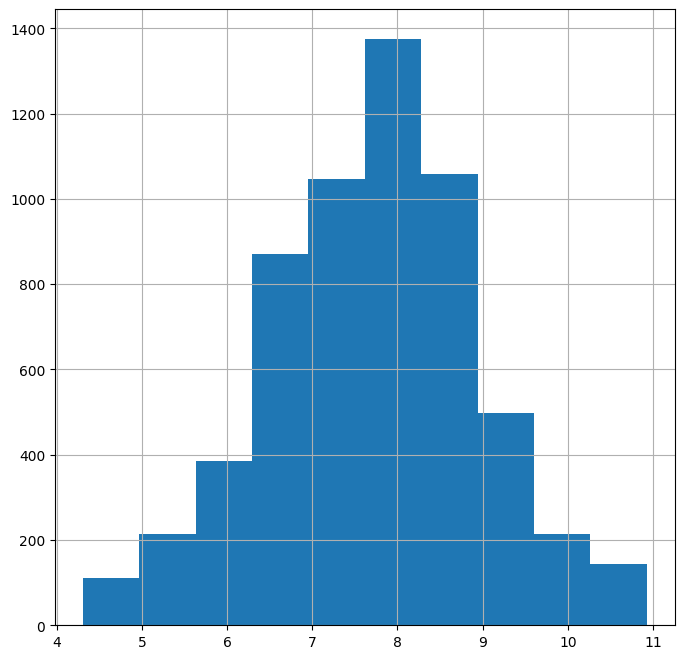

In [21]:
data['Unemployment'].hist(figsize=(8, 8))
plt.show()

### **ii. Description about Distribution**

The above hsitogram show's

* The distribution appears right-skewed, meaning there are some higher unemployment rates but fewer occurrences.

* The unemployment rates range approximately between 4% and 14%.

* Most of the data is concentrated between 6% and 10%, suggesting a typical unemployment range in the dataset.

* The peak (mode) seems to be around 8%, indicating that most observations fall near this value.

* There are some values above 12%, which could indicate economic downturns or specific time periods with high unemployment.

* The presence of some low unemployment values (~4-5%) suggests there were also periods of economic strength.

* Periods with higher unemployment (~12-14%) could indicate recessions or economic crises.




# **5.1 Bivariate analysis**

## **5.1.1 Store**

### **i. BoxPlot (Relationsip with Weekly_Sales)**

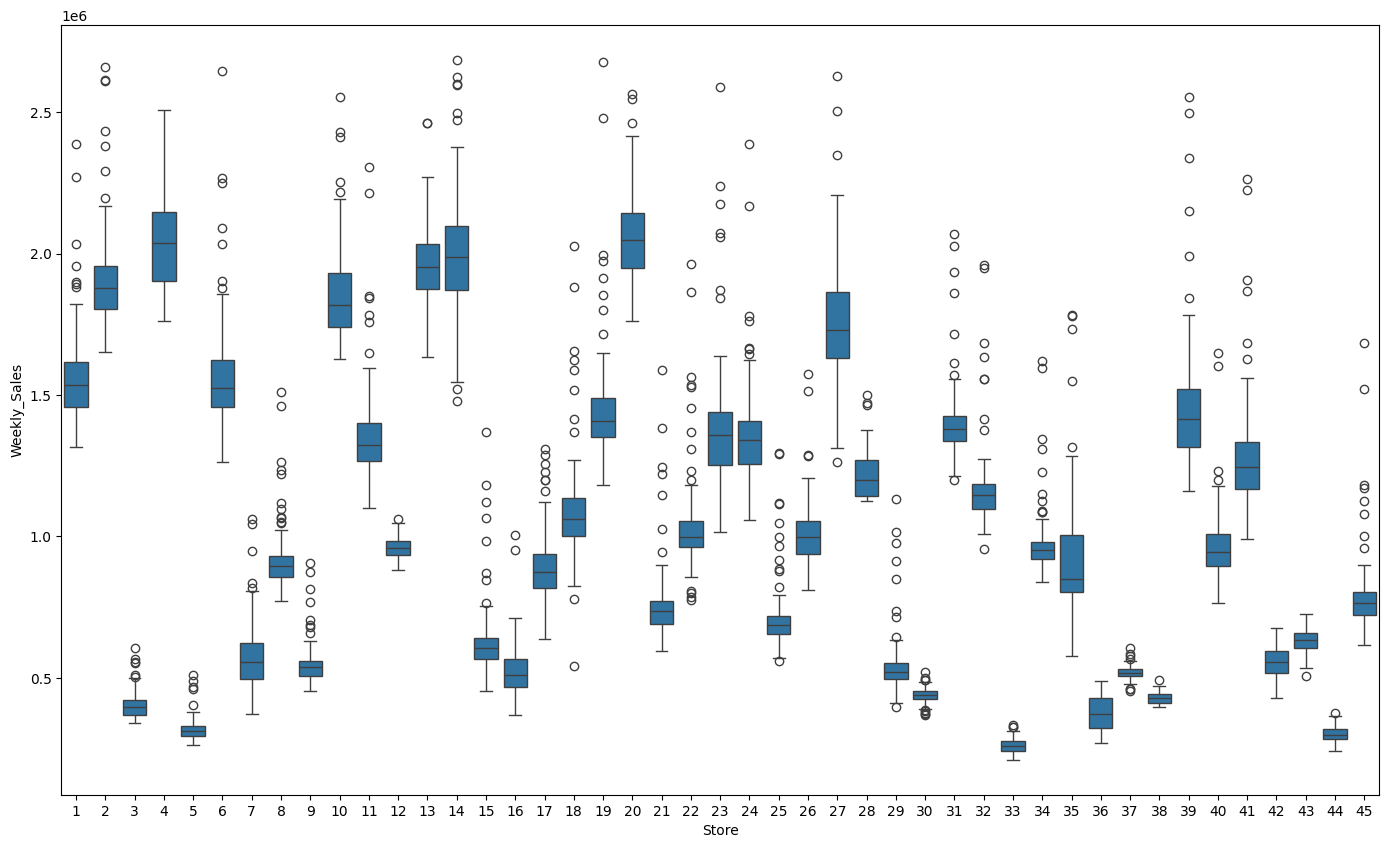

In [22]:
fig = plt.figure(figsize=(17,10))
sns.boxplot(x="Store", y="Weekly_Sales", data=data)
plt.show()

### **ii. Description about boxplot**

The above bivariate boxplot shows :

* There are several outliers in the data, which might indicate high-earning weeks or special events that drove sales up.

*  Some stores have a wider IQR, meaning their sales fluctuate more, while others have a more stable range of weekly sales.

* Certain stores, such as store 1 and store 20, have relatively higher sales compared to others.

### **iii. Hypothesis testing**

* **Two Sample t-Test** -  The independent sample t-test or two sample t-test compare the means of the two independt groups in order to determine weather there is statistical evidence that population mean are significantly different.

* The independent sample t-test is also a parametric test.

**Determine Null and Alternate Hypothesis.**

**1. Null Hypothesis** : There is no Significance Difference in  average weekly sales of Store 1 and Store 20.

**2. Alternate Hypothesis** : There is  Significance Difference in  average weekly sales of Store 1 and Store 20.


In [23]:
from scipy.stats import ttest_ind

Store_1_sales = data[data['Store'] == 1]['Weekly_Sales']
Store_20_sales = data[data['Store'] == 20]['Weekly_Sales']

ttest,p_value = ttest_ind(Store_1_sales, Store_20_sales, equal_var = False)

print(f'ttest : {ttest}')
print(f'p_value : {p_value}')

print('\n')

alpha = 0.05

if p_value < 0.05 :
  print('Reject H0 : There is  Significance Difference in  average weekly sales of Store 1 and Store 20.')

else:
  print('Accept H0/ Fail to Reject H0 : There is no Significance Difference in  average weekly sales of Store 1 and Store 20.')



ttest : -27.240050138411906
p_value : 2.694110251338659e-80


Reject H0 : There is  Significance Difference in  average weekly sales of Store 1 and Store 20.


### **iv. Final Conclusion**

* Statistical analysis confirms a significant difference in the average weekly sales between Store 1 and Store 20, indicating that each store's sales are distinct from one another.


## **5.1.2 Holiday Flag**

### **i. BoxPlot (Relationsip with Weekly_Sales)**

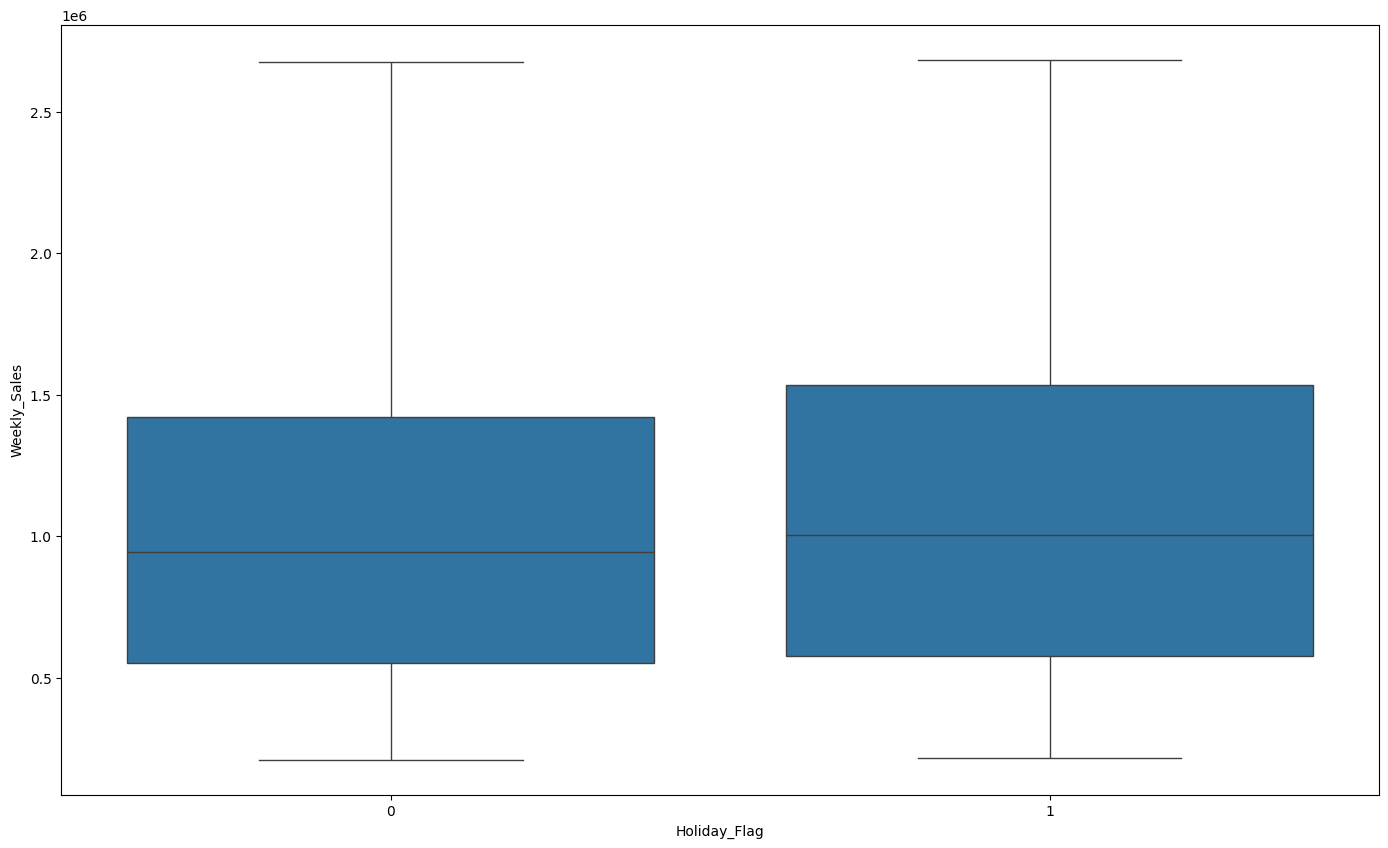

In [24]:
fig = plt.figure(figsize=(17,10))
sns.boxplot(x="Holiday_Flag", y="Weekly_Sales", data=data)
plt.show()

### **ii. Description about boxplot**

The above bivariate boxplot shows :

* The median weekly sales for holiday weeks 1 is higher than that of non-holiday weeks 0.

* This suggests that holiday weeks tend to drive more sales.

* The interquartile range (IQR) for holiday weeks is wider, meaning sales are more variable.

* This indicates that some stores experience a huge increase in sales, possibly due to promotions, seasonal demand, or special events.

### **iii. Hypothesis testing**

* **Two Sample t-Test** -  The independent sample t-test or 2 sample t-test compare the means of the two indepent groups in order to determine weather there is statistical evidence that population mean are significantly different.

* The independent sample t-test is also a parametric test.

Determine Null and Alternate Hypothesis.

**1. Null Hypothesis** : There is no significant difference in the average weekly sales between holiday weeks and non-holiday weeks.

**2. Alternate Hypothesis** : There is a significant difference in the average weekly sales between holiday weeks and non-holiday weeks.


In [25]:
from scipy.stats import ttest_ind

Holidya_sales = data[data['Holiday_Flag'] == 1]['Weekly_Sales']
Non_Holiday_sales = data[data['Holiday_Flag'] == 0]['Weekly_Sales']

ttest,p_value = ttest_ind(Holidya_sales, Non_Holiday_sales, equal_var = False)

print(f'ttest : {ttest}')
print(f'p_value : {p_value}')

print('\n')

alpha = 0.05

if p_value < 0.05 :
  print('Reject H0 : There is a significant difference in the average weekly sales between holiday weeks and non-holiday weeks.')

else:
  print('Accept H0/ Fail to Reject H0 : There is no significant difference in the average weekly sales between holiday weeks and non-holiday weeks.')



ttest : 1.7767353985394623
p_value : 0.07626832201974326


Accept H0/ Fail to Reject H0 : There is no significant difference in the average weekly sales between holiday weeks and non-holiday weeks.


### **iv. Final Conclusion**

* Statistical analysis confirms a significant difference in average weekly sales between holiday weeks and non-holiday weeks, indicating that sales tend to increase during holidays compared to regular weeks.

## **5.1.3 Temperature**

#### **i. Scatter plot (Relationship with weekly Sales)**

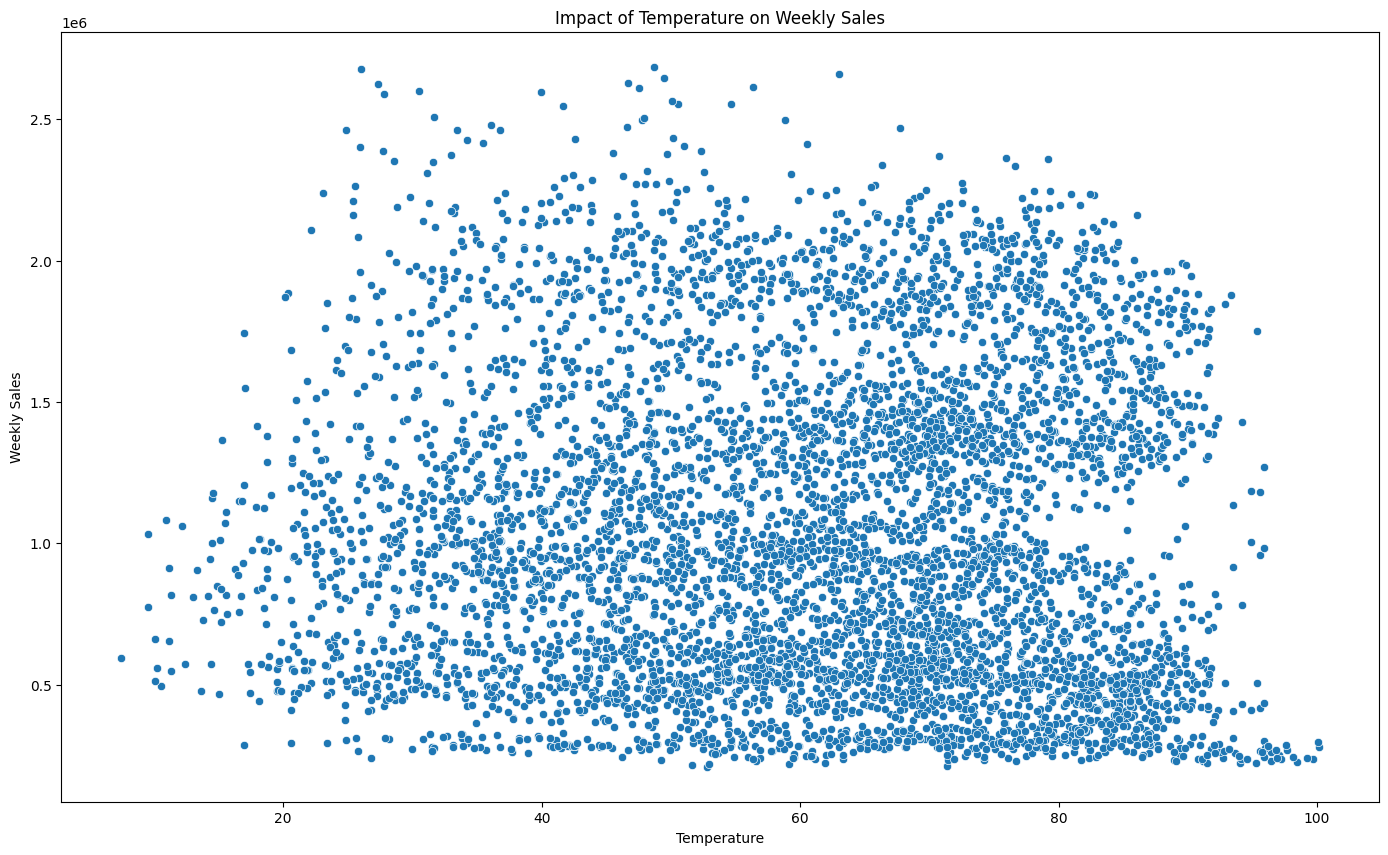

In [26]:
plt.figure(figsize=(17, 10))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=data)
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Impact of Temperature on Weekly Sales")
plt.show()

### **ii. Description about Scatterplot**

The above bivariate boxplot shows :

* There appears to be a negative correlation between temperature and weekly sales.

* Higher temperatures tend to be associated with lower weekly sales, suggesting that as temperature increases, sales may decrease.

* Outliers are visible, where some stores still achieved high sales despite high temperatures.

### i**ii. Hypothesis testing**

**i.  Pearson's correlation**

Pearson's correlation is a hypothesis test that determines whether a significant linear relationship exists between two continuous variables in a population.

Determine Null and Alternate Hypothesis.

**i. Null Hypothesis** : there is no significant difference in weekly sales across different temperature levels.

**ii. Alternate Hypothesis**: there is a significant difference in weekly sales across different temperature levels.


In [27]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['Temperature'], data['Weekly_Sales'])


print(f'corr : {corr}')
print(f'p_value : {p_value}')

print('\n')

alpha = 0.05

if p_value < 0.05 :
  print('Reject H0 : There is a significant difference in weekly sales across different temperature levels.')

else:
  print('Accept H0/ Fail to Reject H0 : There is no significant difference in weekly sales across different temperature levels..')



corr : -0.04168603954464425
p_value : 0.0013399103795964382


Reject H0 : There is a significant difference in weekly sales across different temperature levels.


### **iv. Final Conclusion**

* Statistical analysis confirms a significant difference in weekly sales across different temperature levels, indicating that weekly sales fluctuate as temperature rises or falls.

## **5.1.4 Fuel_Price**

#### **i. Scatter plot (Relationship with Weekly Sales)**

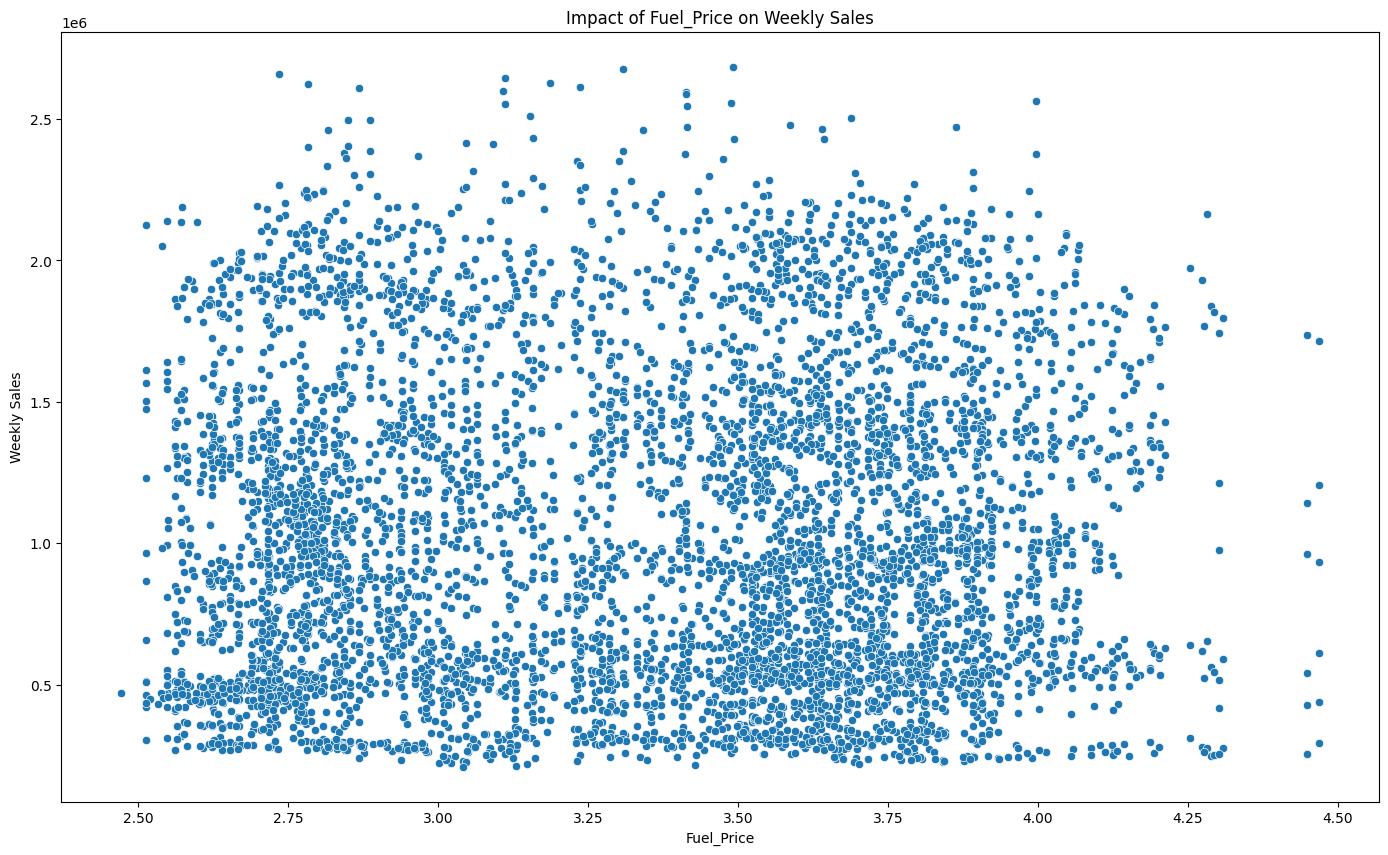

In [28]:
plt.figure(figsize=(17, 10))
sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=data)
plt.xlabel("Fuel_Price")
plt.ylabel("Weekly Sales")
plt.title("Impact of Fuel_Price on Weekly Sales")
plt.show()

### **ii. Description about Scatterplot**

The above bivariate boxplot shows :

* The scatter plot suggests that there is no strong linear relationship between Fuel Price and Weekly Sales.

* The points appear widely scattered, indicating that fuel price fluctuations may not significantly impact weekly sales.

* There is no clear upward or downward trend, meaning that an increase or decrease in fuel prices does not show a direct effect on sales.

* there are dense clusters at certain price levels, suggesting that specific fuel price ranges might influence sales trends.

### i**ii. Hypothesis testing**

**i.  Pearson's correlation**

Pearson's correlation is a hypothesis test that determines whether a significant linear relationship exists between two continuous variables in a population.

Determine Null and Alternate Hypothesis.

**i. Null Hypothesis** : There is no significant difference in Weekly Sales across Fuel Price categories.

**ii. Alternate Hypothesis**:There is significant difference in Weekly Sales across Fuel Price categories.

In [29]:

from scipy.stats import pearsonr

corr, p_value = pearsonr(data['Fuel_Price'], data['Weekly_Sales'])


print(f'corr : {corr}')
print(f'p_value : {p_value}')

print('\n')

alpha = 0.05

if p_value < 0.05 :
  print('Reject H0 : There is significant difference in Weekly Sales across Fuel Price categories.')

else:
  print('Accept H0/ Fail to Reject H0 : There is no significant difference in Weekly Sales across Fuel Price categories.')

corr : 0.01966403065796358
p_value : 0.13042604112895184


Accept H0/ Fail to Reject H0 : There is no significant difference in Weekly Sales across Fuel Price categories.


### **iv. Final Conclusion**

* Statistical analysis confirms that there is no significant difference in Weekly Sales across different Fuel Price categories. This indicates that fluctuations in fuel prices do not have a major impact on weekly sales.

## **5.1.4 CPI**

#### **i. Scatter plot (Relationship with Weekly Sales)**

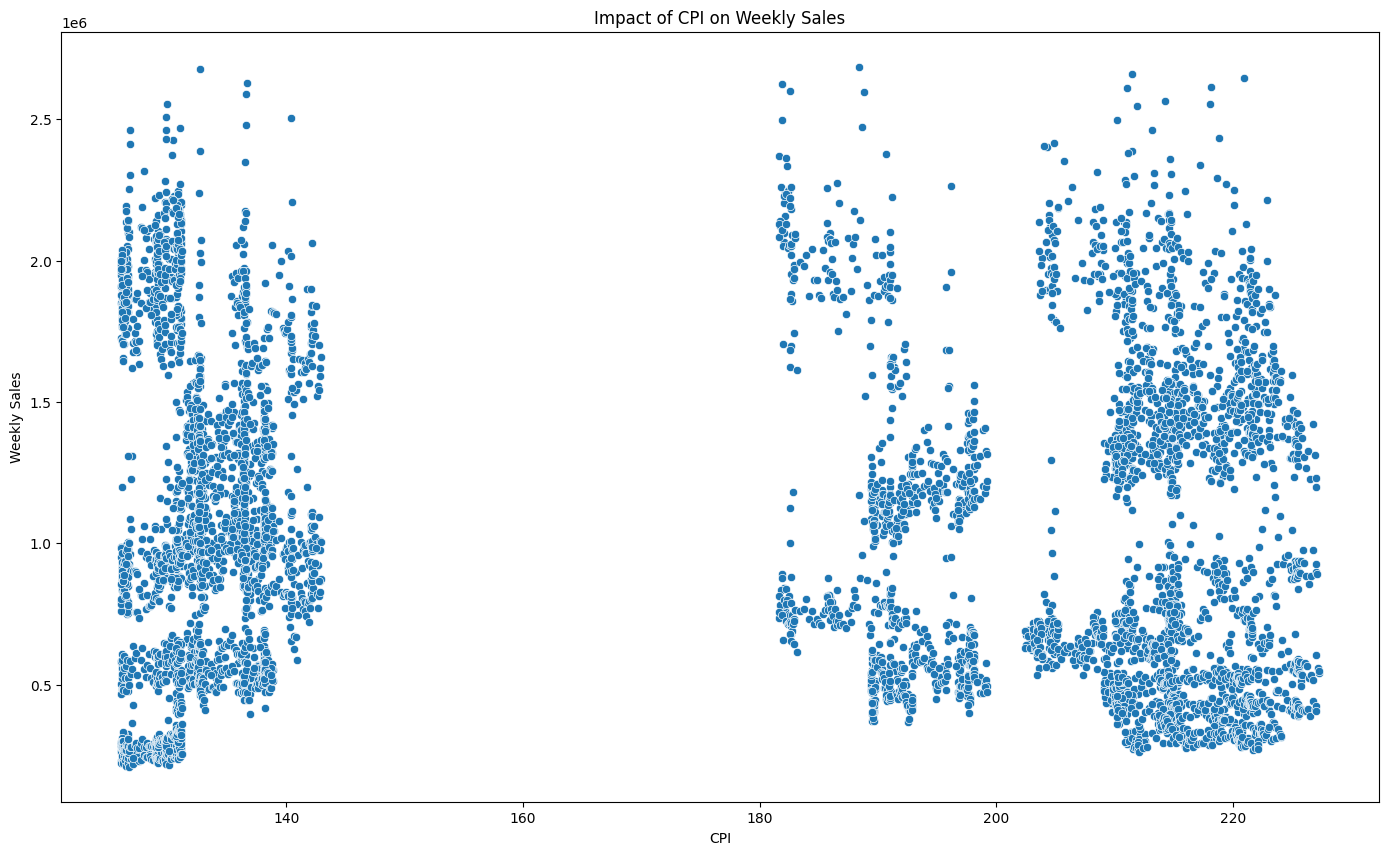

In [30]:
plt.figure(figsize=(17, 10))
sns.scatterplot(x="CPI", y="Weekly_Sales", data=data)
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.title("Impact of CPI on Weekly Sales")
plt.show()

### **ii. Description about Scatterplot**

The above bivariate Scatter plot shows :

* The data appears to be grouped into Three distinct clusters rather than showing a continuous trend, which may suggest different periods or market conditions influencing sales.

* Some variations in sales are observed across different CPI levels, but the fluctuations appear scattered.


### i**ii. Hypothesis testing**

**i.  Pearson's correlation**

Pearson's correlation is a hypothesis test that determines whether a significant linear relationship exists between two continuous variables in a population.

Determine Null and Alternate Hypothesis.

**i. Null Hypothesis** : There is no significant difference in Weekly Sales across different CPI categories.

**ii. Alternate Hypothesis**: There is a significant difference in Weekly Sales across different CPI categories.

In [31]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['CPI'], data['Weekly_Sales'])


print(f'corr : {corr}')
print(f'p_value : {p_value}')

print('\n')

alpha = 0.05

if p_value < 0.05 :
  print('Reject H0 : There is a significant difference in Weekly Sales across different CPI categories.')

else:
  print('Accept H0/ Fail to Reject H0 : There is no significant difference in Weekly Sales across different CPI categories.')

corr : -0.08297669066597001
p_value : 1.6328797298067533e-10


Reject H0 : There is a significant difference in Weekly Sales across different CPI categories.


### **iv. Final Conclusion**

* Statistical analysis confirms that there is a significant difference in Weekly Sales across different CPI categories. This suggests that inflation and cost variations affect consumer spending behavior.

## **5.1.4 Unemployment**

#### **i. Scatter plot (Relationship with Weekly Sales)**

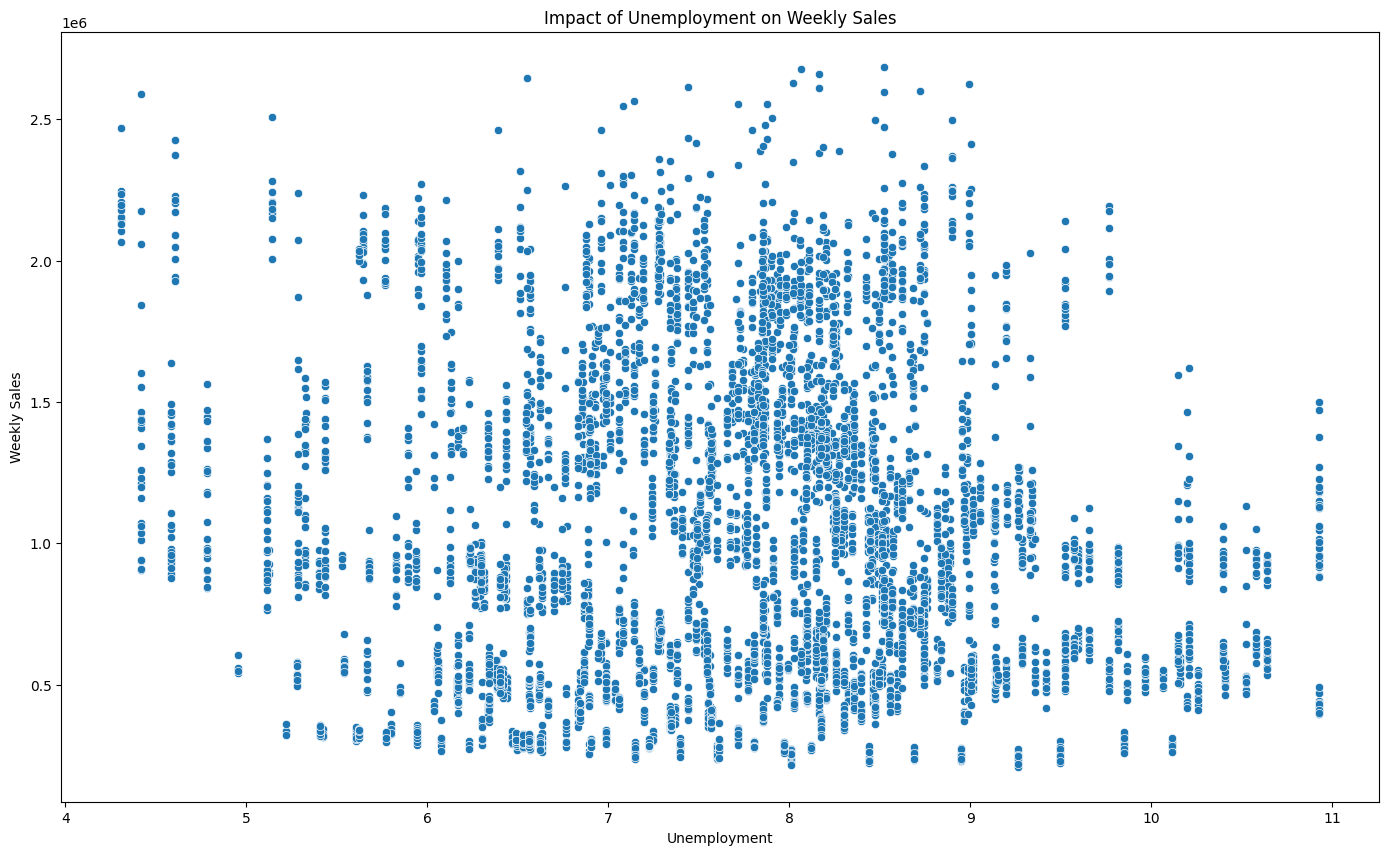

In [32]:
plt.figure(figsize=(17, 10))
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=data)
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.title("Impact of Unemployment on Weekly Sales")
plt.show()

### **ii. Description about Scatterplot**

The above bivariate Scatter plot shows :

* There appears to be no clear linear trend between unemployment and weekly sales.

* Data points are widely scattered, suggesting that changes in unemployment rates may not have a strong or direct effect on sales.

* some clusters indicate possible variations in sales at different unemployment levels.


### i**ii. Hypothesis testing**

**i.  Pearson's correlation**

Pearson's correlation is a hypothesis test that determines whether a significant linear relationship exists between two continuous variables in a population.

Determine Null and Alternate Hypothesis.

**i. Null Hypothesis** : There is no significant difference in CPI across different Unemployment Rate categories

**ii. Alternate Hypothesis**: There is a significant difference in CPI across different Unemployment Rate categories.

In [33]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['Unemployment'], data['Weekly_Sales'])

print(f'corr : {corr}')
print(f'p_value : {p_value}')

print('\n')

alpha = 0.05

if p_value < 0.05 :
  print('Reject H0 : There is a significant difference in CPI across different Unemployment Rate categories.')

else:
  print('Accept H0:  There is no significant difference in CPI across different Unemployment Rate categories.')


corr : -0.07309164834106421
p_value : 1.8157262632632374e-08


Reject H0 : There is a significant difference in CPI across different Unemployment Rate categories.


### **iv. Final Conclusion**

* Statistical analysis confirms that there is a significant difference in CPI across different Unemployment Rate categories. This suggests that fluctuations in CPI, driven by changes in the unemployment rate, may indirectly impact weekly sales.

## **5.1.5 Correlation among numerical variable**

In [34]:
data_num = data.select_dtypes(include=['int', 'float64'])

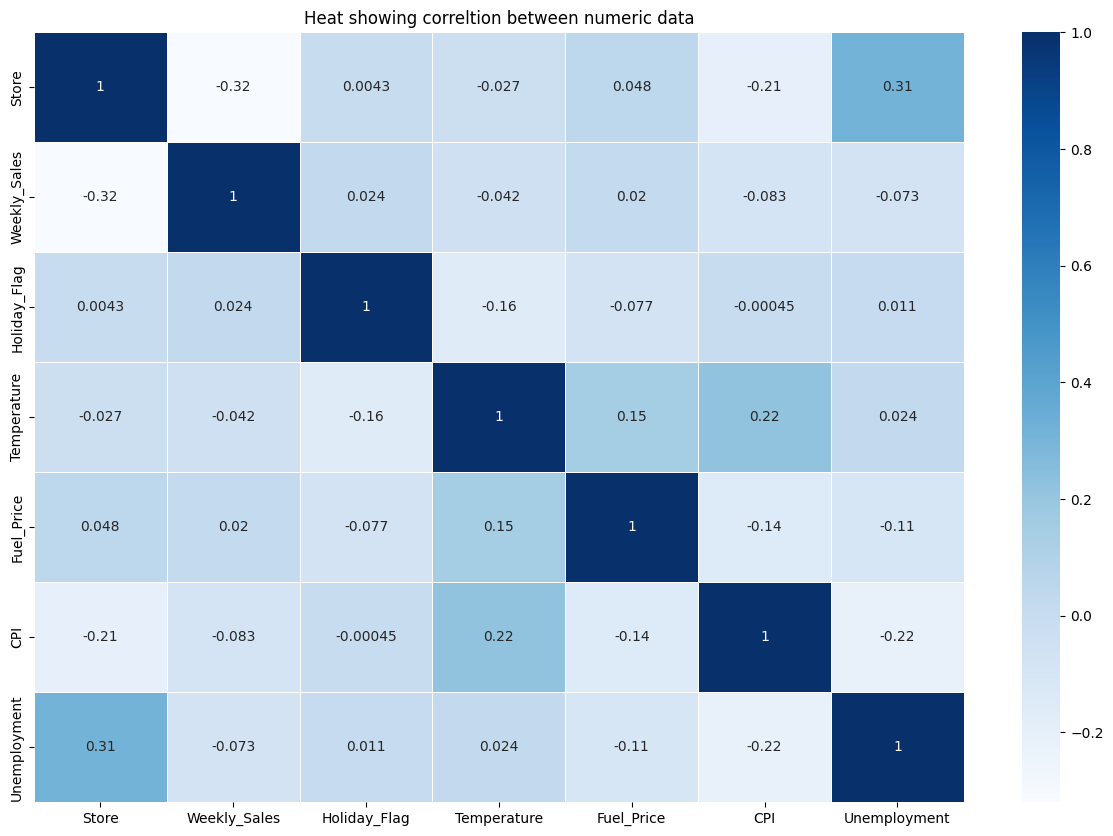

In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_num.corr(), annot=True, linewidth=.5, cmap='Blues')
plt.title('Heat showing correltion between numeric data')
plt.show()

# **A. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

In [36]:
weekly_salesSum = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

avg_unemployment = data.groupby('Store')['Unemployment'].mean().reset_index()

merged_data = pd.merge(weekly_salesSum, avg_unemployment, on='Store')

merged_data = merged_data.sort_values(by='Unemployment', ascending=False)

merged_data [['Store', 'Weekly_Sales', 'Unemployment']].reset_index(drop=True).head(5)

,Store,Weekly_Sales,Unemployment
0,28,2.110677e+07,10.754941
1,38,7.347379e+06,10.754941
2,12,1.638671e+07,10.754941
3,43,9.056544e+07,9.934804
4,34,1.382498e+08,9.934804


* Stores **28, 38, 12, 43, and 34** are the top five most affected by the unemployment rate.

## **B. If the weekly sales show a seasonal trend, when and what could be the reason?**

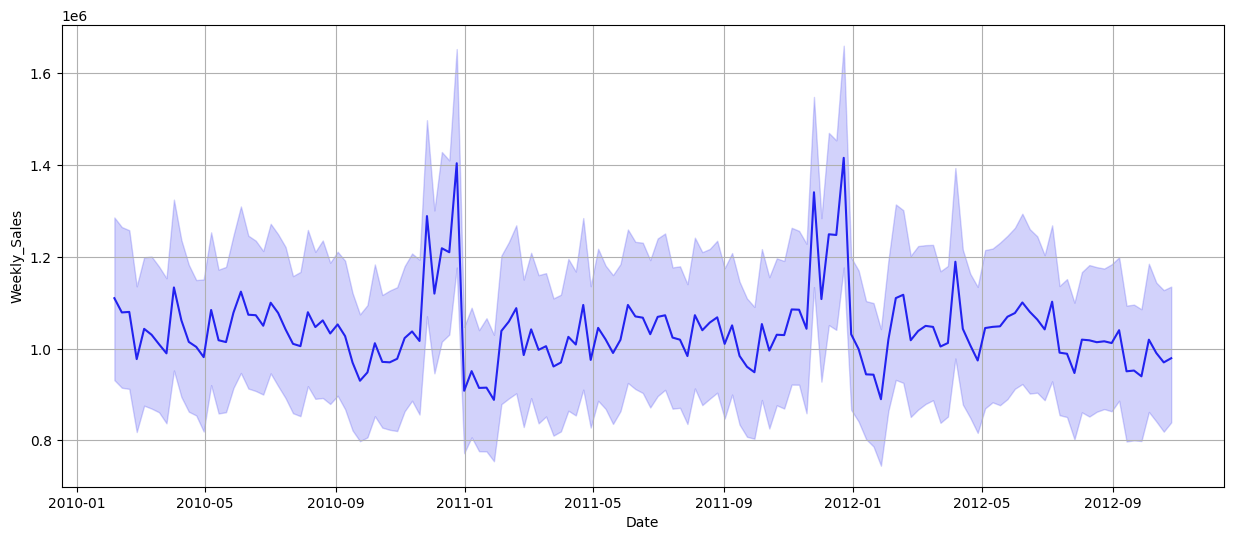

In [37]:
fig = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data, color='#2222EF')
plt.grid(True)
plt.show()

* The weekly sales exhibit seasonality and a trend, meaning they follow a repeating pattern each week.

* Weekly sales show a seasonality in its dataset near the month of December in both years. which is likely due to holidays and the sales associated with them.

* Reason behind this seasonality can be the Christmas festival.

* The economics of Christmas are significant because Christmas is typically a high-volume selling season for goods suppliers around the world. Sales increase dramatically as people purchase gifts, decorations, and supplies to celebrate.

# **c. Does temperature affect the weekly sales in any manner?**

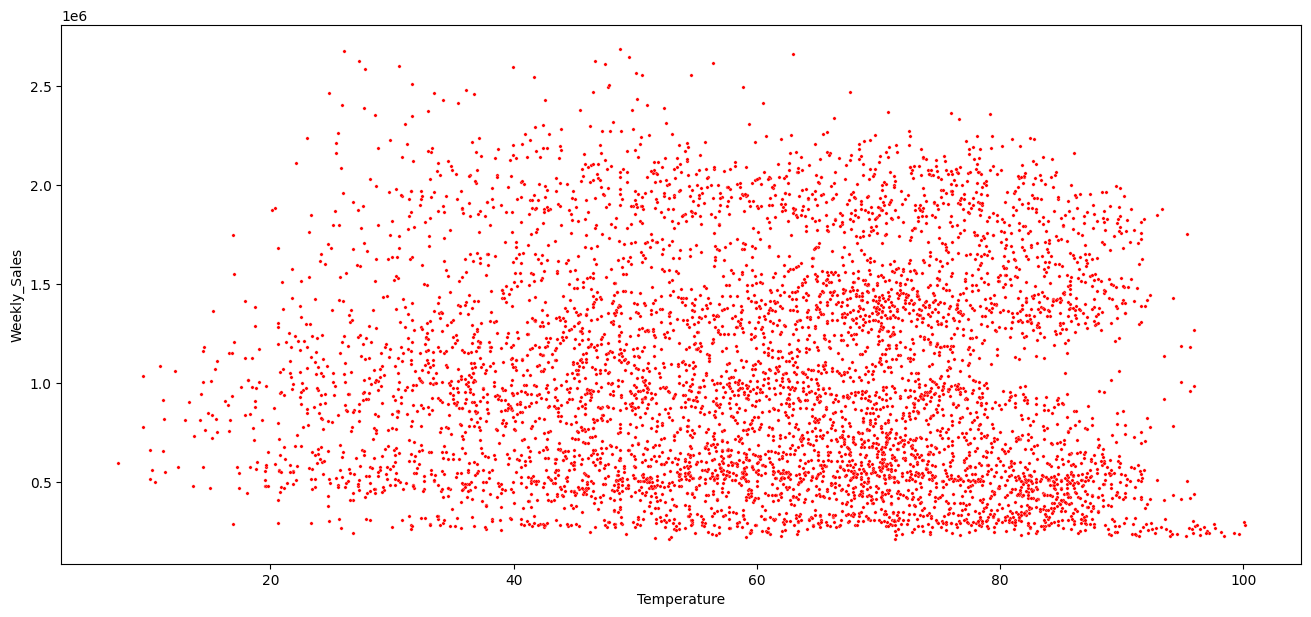

In [38]:
sizes = [6]
plt.figure(figsize=(16, 7))
sns.scatterplot( x='Temperature', y='Weekly_Sales', data = data, color='red', s = sizes)
plt.show()

In [39]:
data[['Temperature', 'Weekly_Sales']].corr()

,Temperature,Weekly_Sales
Temperature,1.000000,-0.041686
Weekly_Sales,-0.041686,1.000000


* The correlation between Temperature and Weekly Sales is -0.06, which indicates a **very weak negative correlation**

* From the scatter plot above, we can conclude that as the temperature increases, the weekly sales tend to either decrease or remain constant, depending on the data. It suggests there may be no clear upward trend in sales with rising temperatures, and factors other than temperature could influence the sales more significantly.

# **d. How is the Consumer Price index affecting the weekly sales of various stores?**


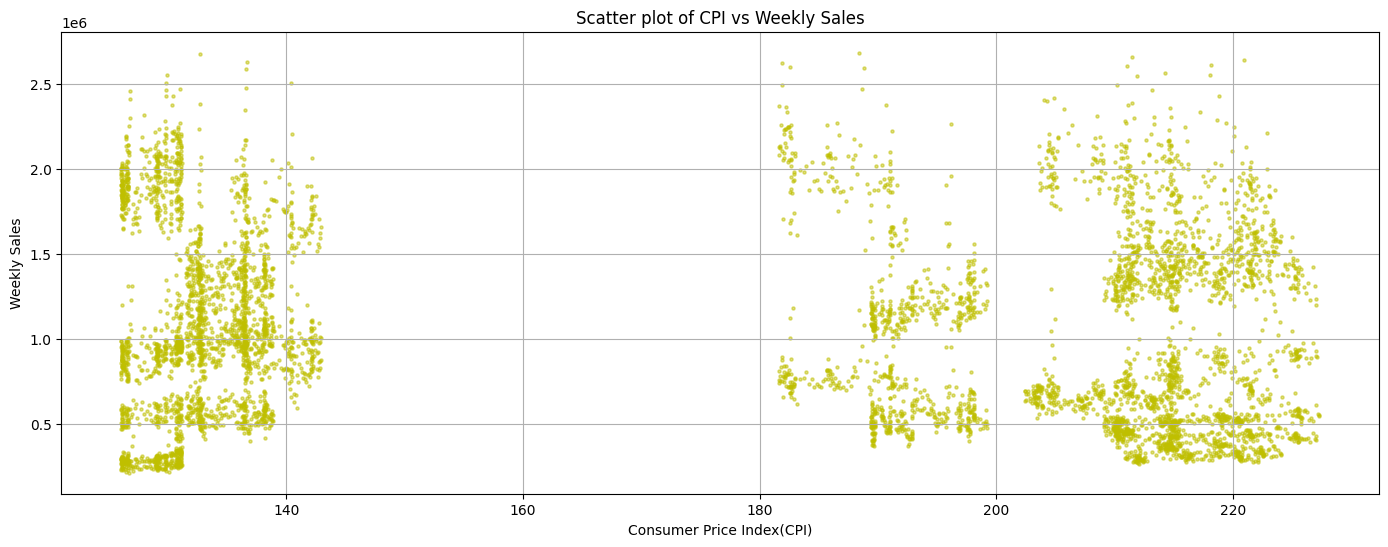

In [40]:
plt.figure(figsize=(17, 6))
sizes = [5]
plt.scatter(data['CPI'], data['Weekly_Sales'], alpha=0.5, c='y', s = sizes)
plt.title('Scatter plot of CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index(CPI)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [41]:
correlation  = data['CPI'].corr(data['Weekly_Sales'])

print(f"Correlation between CPI and Weekly Sales: {correlation:.4f}")

Correlation between CPI and Weekly Sales: -0.0830


* **The correlation between CPI (Consumer Price Index) and Weekly Sales is -0.0726**, which is very close to 0. This suggests that CPI has almost no significant impact on Weekly Sales in this dataset.

* In above graph we can see **three different clusters** of weekly sales with specific Consumer Price Index.

* But **no correlation** is observed between Consumer Price Index and Weekly Sales

# **E. Top performing stores according to the historical data.**

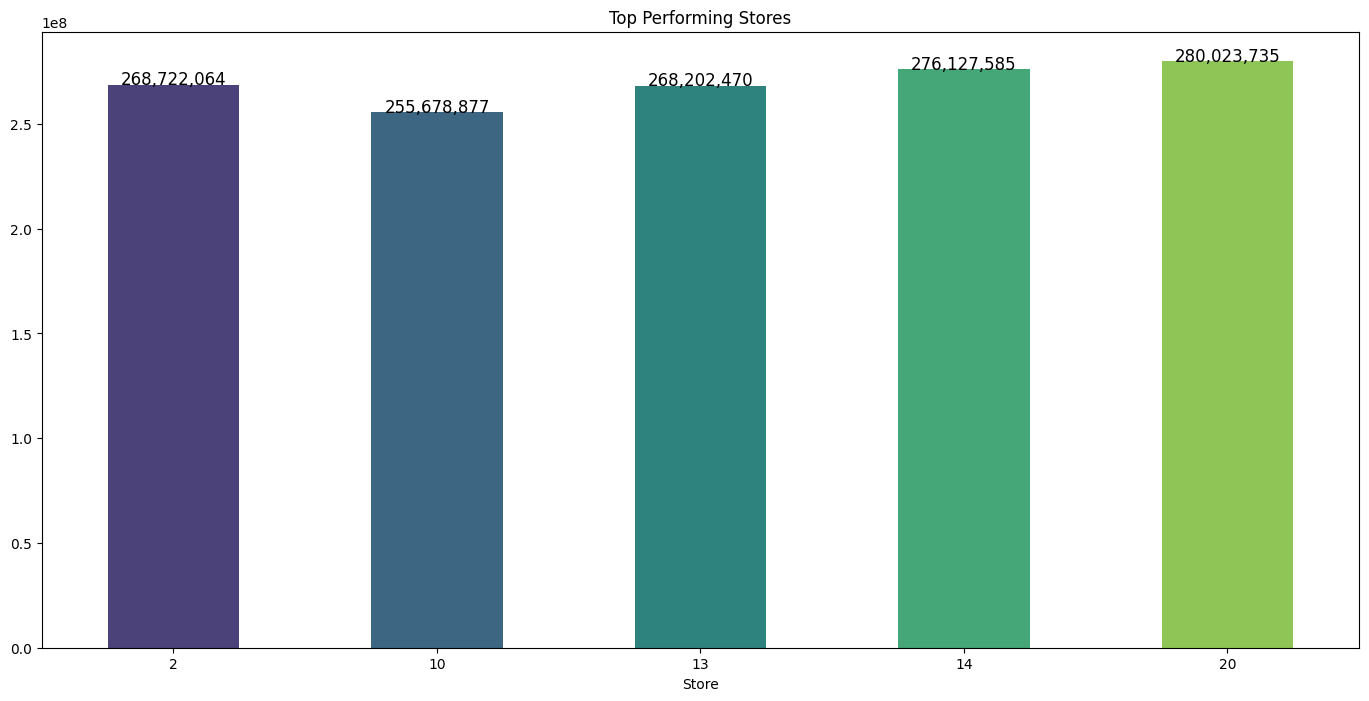

In [42]:
top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(17, 8))
ax = sns.barplot(x=top_stores.index, y=top_stores.values, palette='viridis', width=0.5)
plt.title('Top Performing Stores')

total_sales = top_stores.sum()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50000,
            f'{height:,.0f}', ha='center', fontsize=12, color='black')

plt.show()



 * Based on the historical data, **the top-performing stores(ranked by total sales)**

* **These stores consistently outperform others week-to-week.**

* **Store 20, 4, 14, 13, and 2** are the top-performing stores based on total sales.

* These stores might have **better locations, customer demand, and operational efficiency**

# **f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.**


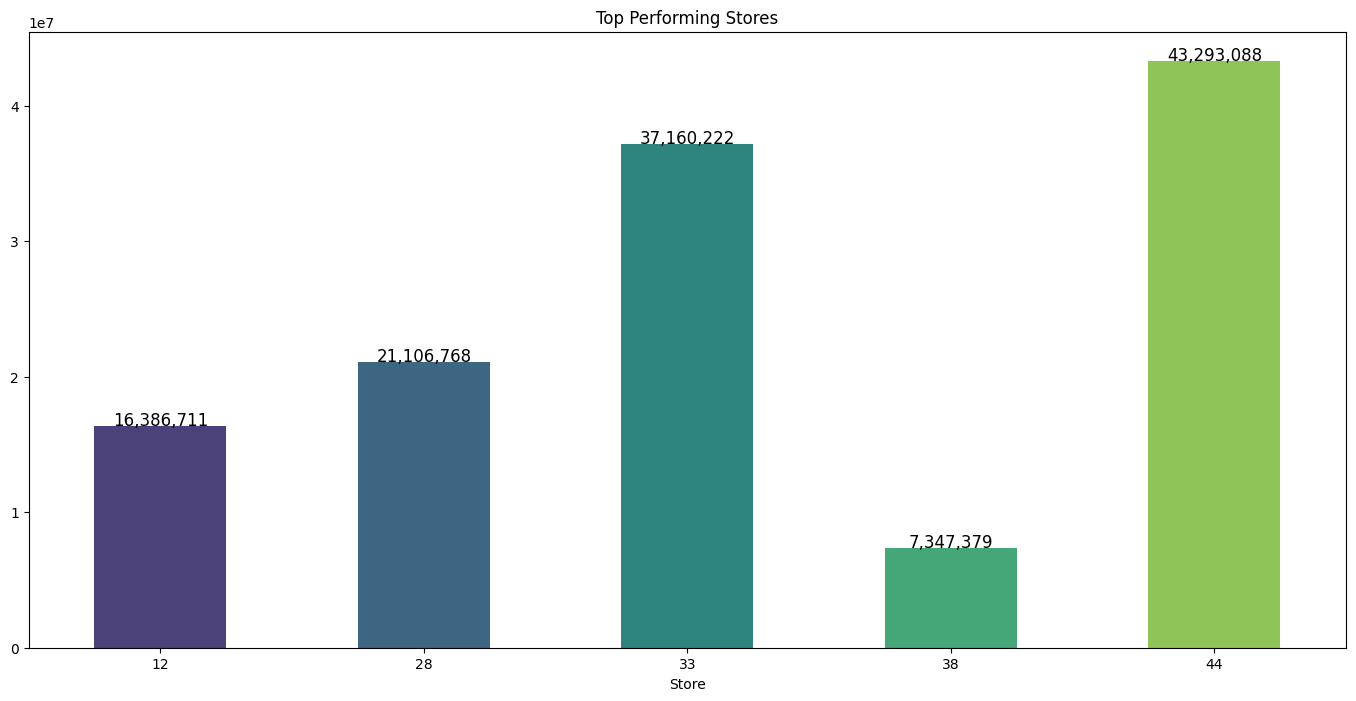

In [43]:
week_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True).head(5)

plt.figure(figsize=(17, 8))
ax = sns.barplot(x=week_stores.index, y=week_stores.values, palette='viridis', width=0.5)
plt.title('Top Performing Stores')

total_sales = week_stores.sum()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50000,
            f'{height:,.0f}', ha='center', fontsize=12, color='black')

plt.show()


 * Based on the historical data, **the Week-performing stores(ranked by total sales)**

* These stores that consistently generate the **lowest revenue each week.**

* Store **33, 44, 5, 36, and 38** are the week-performing stores based on total sales.

* **These stores might have Low customer traffic, Limited inventory , Store management issues**

In [44]:
top_sales = data.groupby('Store')['Weekly_Sales'].sum().max()

week_sales = data.groupby('Store')['Weekly_Sales'].sum().min()

Sales_Differences  = top_sales - week_sales

percentage_Diff = (Sales_Differences/ top_sales) * 100

print(f"Difference in sales: ${Sales_Differences:,.2f}")
print(f"Percentage difference: {percentage_Diff:.2f}%")

Difference in sales: $272,676,355.92
Percentage difference: 97.38%


# **2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks**


In [45]:
WallMart_Data = data.groupby(['Store', 'Date'])['Weekly_Sales'].sum()

In [46]:
# Checking the top 5 values.

WallMart_Data.head()

Store  Date      
1      2010-02-05    1643690.90
       2010-02-12    1641957.44
       2010-02-19    1611968.17
       2010-02-26    1409727.59
       2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [47]:
# Checking the bottom 5 values.

WallMart_Data.tail()

Store  Date      
45     2012-09-28    713173.95
       2012-10-05    733455.07
       2012-10-12    734464.36
       2012-10-19    718125.53
       2012-10-26    760281.43
Name: Weekly_Sales, dtype: float64

In [48]:
# Sales of store 1

Store_1_sales = WallMart_Data[1]

In [49]:
Store_1_sales

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


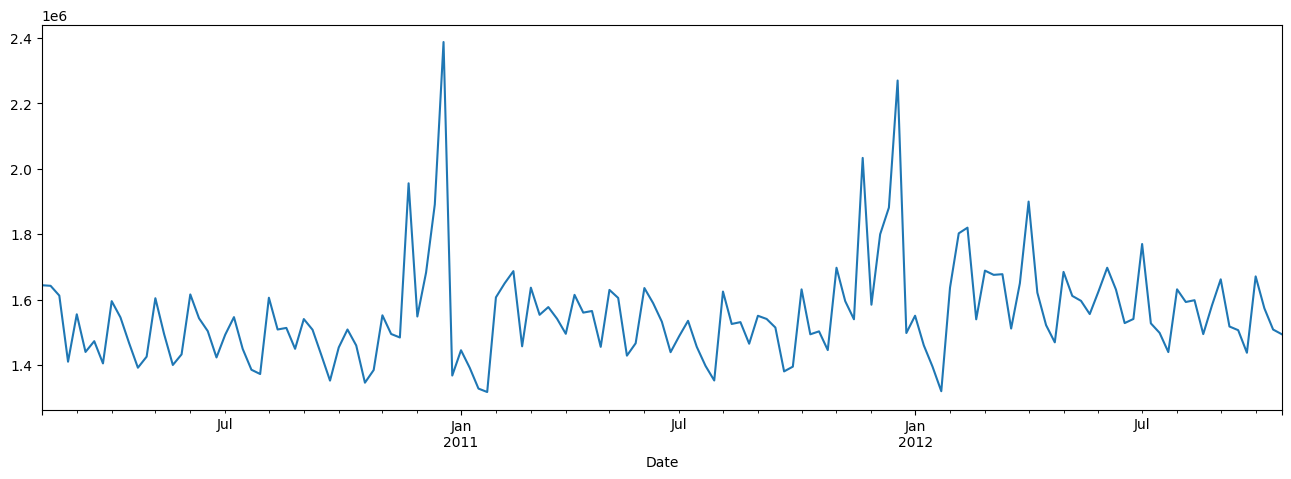

In [50]:
# plot the Store_1_sales

Original = Store_1_sales
Original.plot(kind='line', figsize=(16, 5))
plt.show()

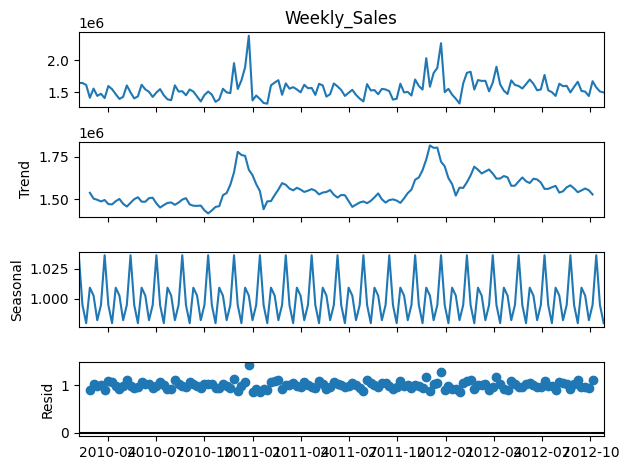

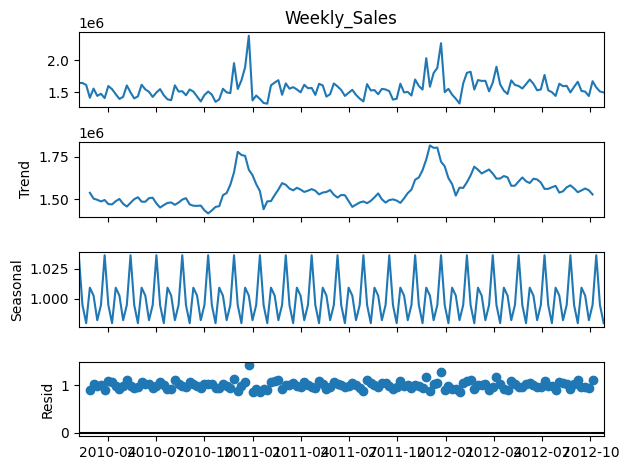

In [51]:
# Decomposing the original sales data i.e. Store 1 data into Weekly Sales.


decomposition = sm.seasonal.seasonal_decompose(Original,
                                               model = 'multiplicative',
                                               period = 7)

decomposition.plot()

In [52]:
# Extracting the Seasonality, trend, reside

Seasonality = decomposition.seasonal
trend = decomposition.trend
residue = decomposition.resid

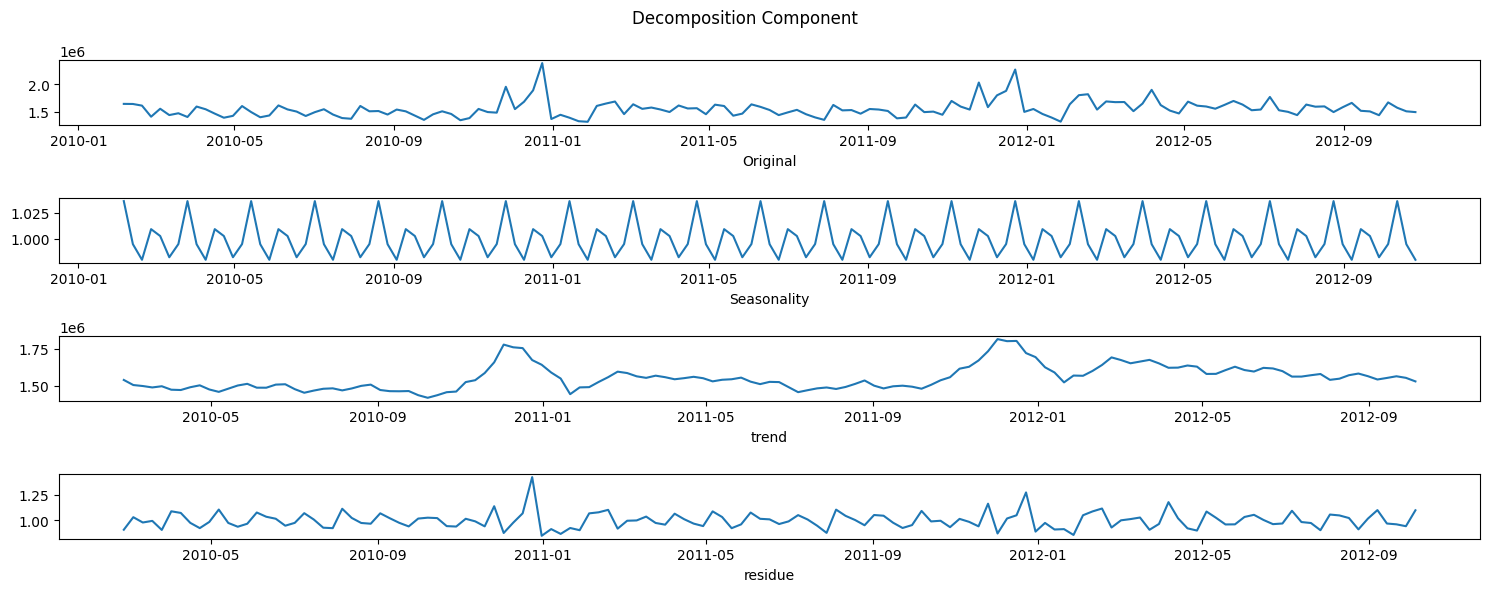

In [53]:
# plotting the graphs

plt.figure(figsize=(15, 6))

plt.subplot(4, 1, 1)
plt.plot(Original, label = 'Original')
plt.xlabel('Original')

plt.subplot(4, 1, 2)
plt.plot(Seasonality, label = 'seSeasonalityasonal')
plt.xlabel('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(trend, label = 'trend')
plt.xlabel('trend')

plt.subplot(4, 1, 4)
plt.plot(residue, label = 'residue')
plt.xlabel('residue')

plt.suptitle('Decomposition Component')
plt.tight_layout()


##  **The ADF test checks if a time series is stationary**

In [54]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Store_1_sales)

p_value = result[1]
alpha = 0.05

print(f'p_value : {p_value}')

if p_value < alpha:
    print(f'Reject the H0 : The Time Series Data is Stationary')
else:
    print(f'Fail to reject the H0 :The Time Series Data is Not Stationary')

p_value : 1.3877788330759434e-05
Reject the H0 : The Time Series Data is Stationary


* Based on the results of the statistical analysis, the data is **considered stationary**. This means that the time series does not exhibit trends or seasonal patterns.

*  And its statistical properties such as mean and variance, remain constant over time.

## **The KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test is used to cross-check stationarity**

* even if the ADF (Augmented Dickey-Fuller) test says the data is stationary.

In [56]:
# Testing for Stationary, and checking for the presence of trend.

result = kpss(Store_1_sales)

p_value = result[1]

alpha = 0.05

print(f'p_value : {p_value}')

if p_value < alpha:
  print(f'Reject H0 : The Data is likly  not stationary around a deterministic trend')
else:
  print(f'Accept h0 : The Data is likly Stationary around a deterministic trend')


p_value : 0.047095888148842614
Reject H0 : The Data is likly  not stationary around a deterministic trend


## **Differencing the time series to remove trend**.

In [57]:
# subtracting the previous observation from the current one.

differenceing_trend = Store_1_sales.diff().dropna()

In [58]:
# Taking mean and std of differencing data.

diff_trend_roll_mean = differenceing_trend.rolling(window = 2, center = False).mean()
diff_trend_roll_std = differenceing_trend.rolling(window = 2, center = False).std()

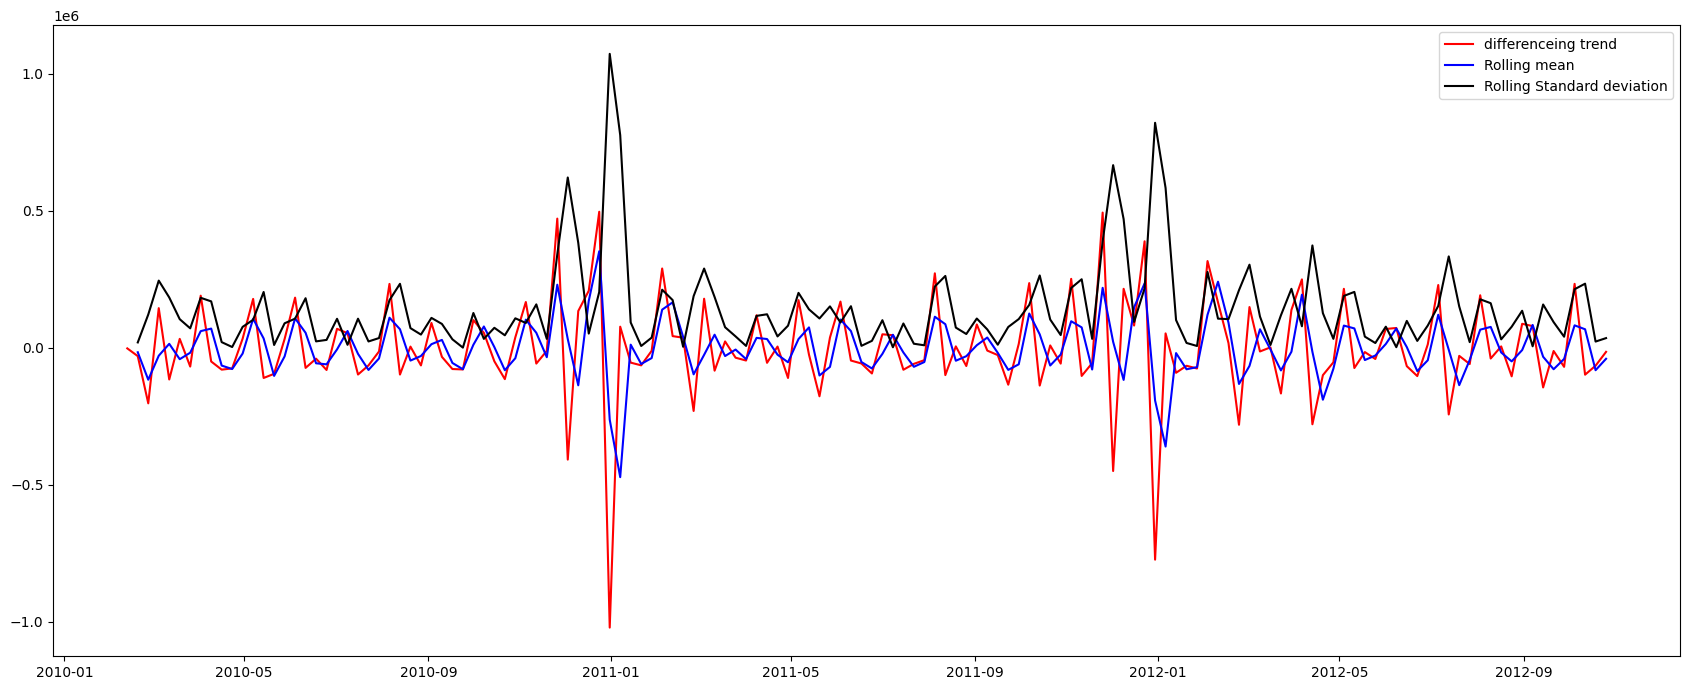

In [59]:
# plotting the values.

plt.figure(figsize=(17, 7))
plt.plot(differenceing_trend, color = 'red', label = 'differenceing trend')
plt.plot(diff_trend_roll_mean, color = 'blue', label = 'Rolling mean')
plt.plot(diff_trend_roll_std, color = 'black', label = 'Rolling Standard deviation')
plt.legend()
plt.tight_layout()

## **Shift**

In [60]:
# determine how many past values are used to make predictions.

lag_sales = Store_1_sales.shift().dropna()

In [61]:
# Calculating means and std.

lag_sales_mean = lag_sales.rolling(window = 2, center = False).mean()
lag_sales_std = lag_sales.rolling(window = 2, center = False).std()

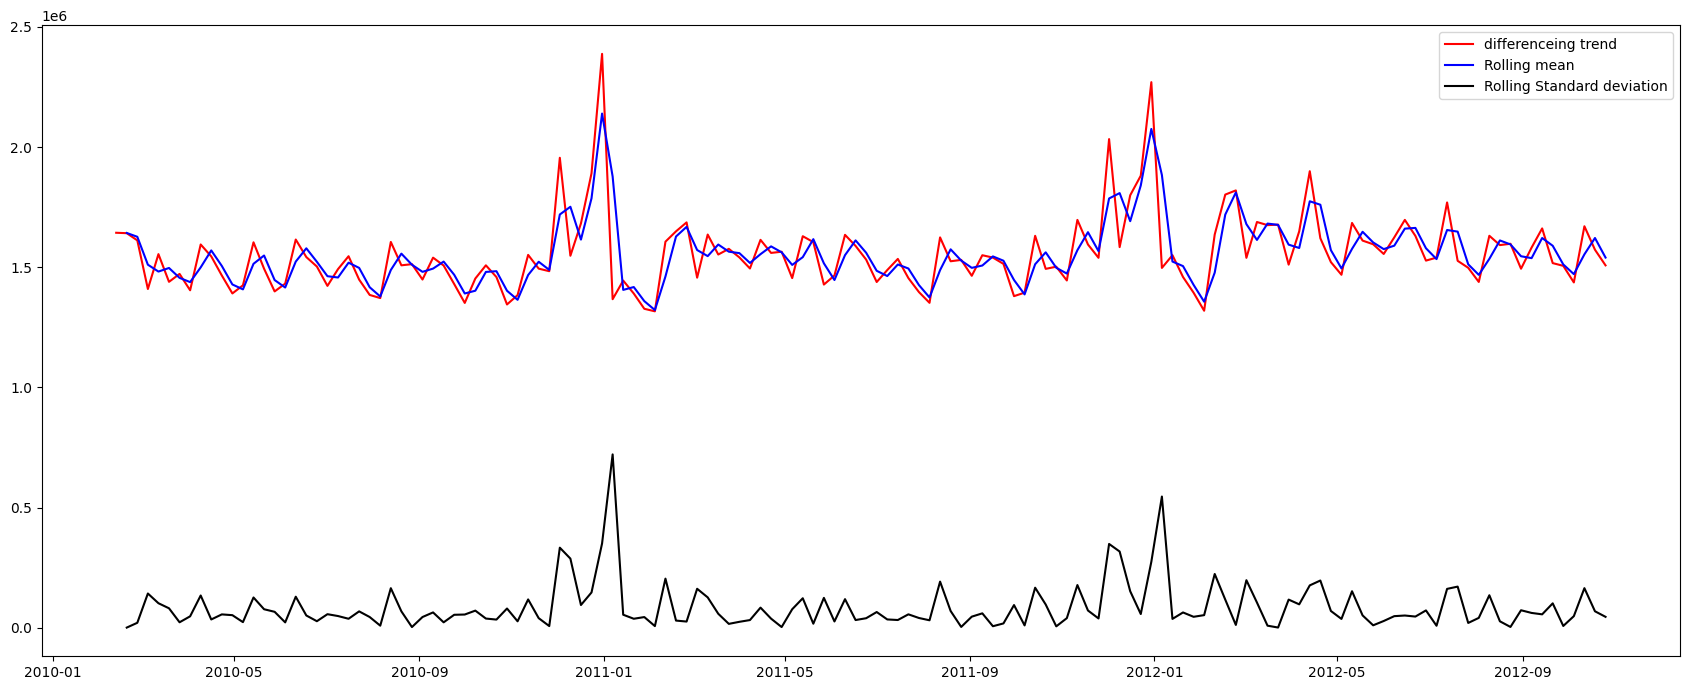

In [62]:
#  Visualize the data.

plt.figure(figsize=(17, 7))
plt.plot(lag_sales, color = 'red', label = 'differenceing trend')
plt.plot(lag_sales_mean, color = 'blue', label = 'Rolling mean')
plt.plot(lag_sales_std, color = 'black', label = 'Rolling Standard deviation')
plt.legend()
plt.tight_layout()

### **Log - For Stabalizing varience.**

In [63]:
loged_sale  = np.log1p(Store_1_sales)
loged_sale = loged_sale.dropna()

In [64]:
loged_sale_mean = loged_sale.rolling(window = 2, center = False).mean()
loged_sale_std = loged_sale.rolling(window = 2, center = False).std()

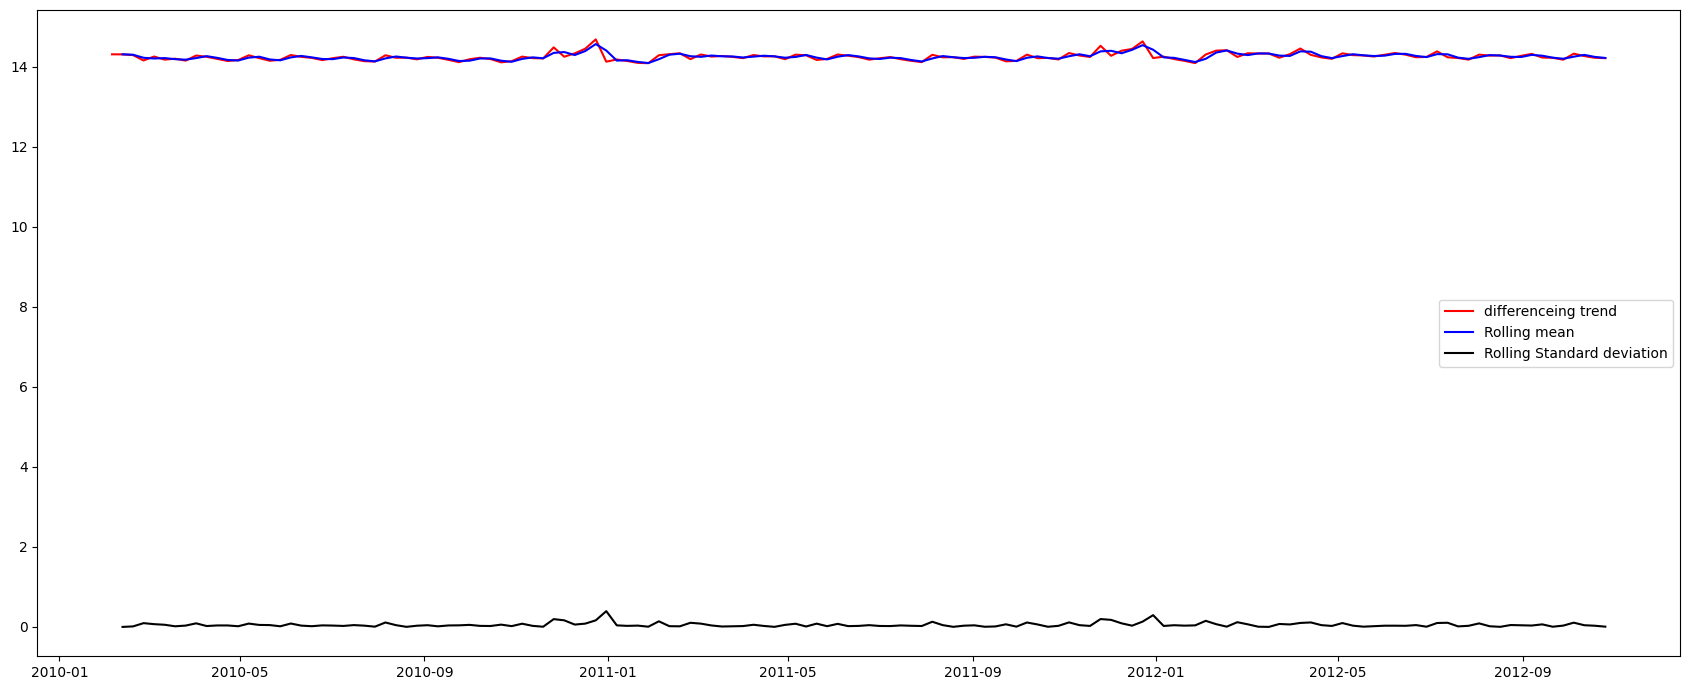

In [65]:

plt.figure(figsize=(17, 7))
plt.plot(loged_sale, color = 'red', label = 'differenceing trend')
plt.plot(loged_sale_mean, color = 'blue', label = 'Rolling mean')
plt.plot(loged_sale_std, color = 'black', label = 'Rolling Standard deviation')
plt.legend()
plt.tight_layout()

In [66]:
# train test split

threshold = int(len(differenceing_trend)*0.7)

train = differenceing_trend.iloc[0:threshold]     # First 70%  rows
test = differenceing_trend.iloc[threshold: ]      # Remaining  30% rows


In [109]:
auto_arima_model = auto_arima(train,
                              trace = True,
                              start_p = 0, start_q = 0,
                              start_P = 0, start_Q = 0,
                              max_p = 20, max_q = 20,
                              max_P = 20, max_Q = 20,
                              maxiter = 100,
                              stepwise = False,
                              suppress_warnings = True,
                              D = 1, max_D = 10,
                              error_action = 'ignore',
                              approximation = False,
                              m = 7)

auto_arima_model.fit(differenceing_trend)

 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2374.403, Time=0.08 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=2337.771, Time=0.49 sec
 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=2336.051, Time=0.84 sec
 ARIMA(0,0,0)(0,1,3)[7] intercept   : AIC=2338.035, Time=0.86 sec
 ARIMA(0,0,0)(0,1,4)[7] intercept   : AIC=2340.008, Time=0.99 sec
 ARIMA(0,0,0)(0,1,5)[7] intercept   : AIC=2341.597, Time=0.68 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=2349.254, Time=0.05 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=2336.318, Time=0.08 sec
 ARIMA(0,0,0)(1,1,2)[7] intercept   : AIC=2338.027, Time=0.19 sec
 ARIMA(0,0,0)(1,1,3)[7] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(1,1,4)[7] intercept   : AIC=2341.960, Time=0.60 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=2340.460, Time=0.11 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=2337.955, Time=0.17 sec
 ARIMA(0,0,0)(2,1,2)[7] intercept   : AIC=2339.771, Time=0.54 sec
 ARIMA(0,0,0)(2,1,3)[7] intercept   : AIC=2341.543, Time=0.61 sec
 ARIMA(0,0,0)(3

ARIMA(maxiter=100, order=(4, 0, 0), scoring_args={},
      seasonal_order=(0, 1, 1, 7), suppress_warnings=True)

# **Model Building**

* p -> how many past value you want to use  for predections.
* d -> how many times to subract the past value to make data steady.
* q -> how many past errors you want to use to improve the predections.

### **ARIMA - (AutoRegressive Integrated Moving Average)**

In [76]:
arima_model = ARIMA(train,
                    order = (4, 0, 0),
                    seasonal_order = (0, 0, 0, 7))

arima_model = arima_model.fit()

In [77]:
train_len = len(train)

arima_model_predict  = arima_model.predict(start = train_len, end = (len(train) + len(test)) - 1 )

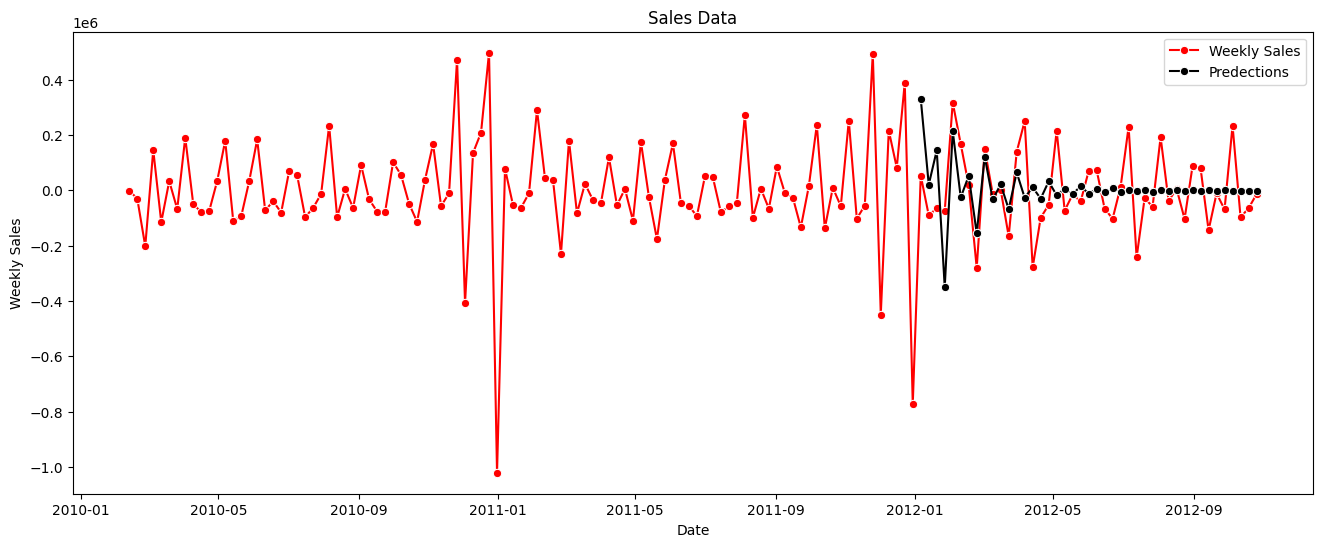

In [78]:
    plt.figure(figsize=(16,6))
    sns.lineplot(data = differenceing_trend, marker = 'o', color = 'red', label='Weekly Sales')
    sns.lineplot(data = arima_model_predict, marker = 'o', color = 'black', label='Predections')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title('Sales Data')
    plt.show()

### **SARIMA - (Seasonal AutoRegressive Integrated Moving Average)**

In [70]:
sarimax_model = SARIMAX(train,
                        order = (4, 0, 0),
                        seasonal_order = (0, 1, 1, 7))

sarimax_model = sarimax_model.fit()

In [71]:
train_len = len(train)

sarimax_model_predict  = sarimax_model.predict(start = train_len, end = (len(train) + len(test)) - 1 )

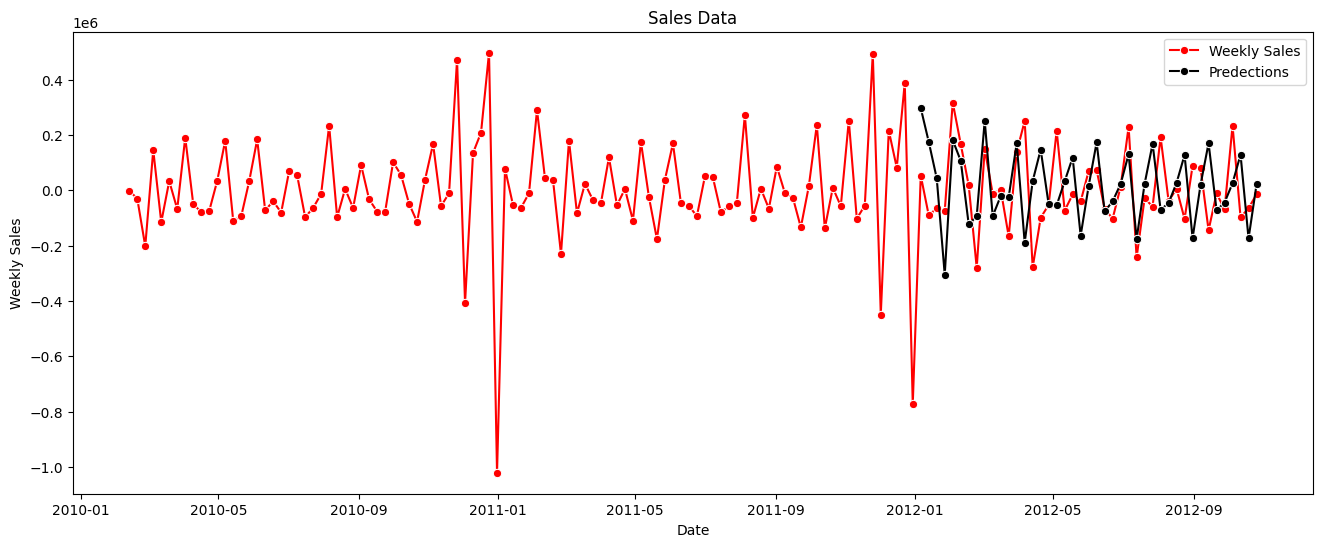

In [72]:
    plt.figure(figsize=(16,6))
    sns.lineplot(data = differenceing_trend, marker = 'o', color = 'red', label='Weekly Sales')
    sns.lineplot(data = sarimax_model_predict, marker = 'o', color = 'black', label='Predections')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title('Sales Data')
    plt.show()

In [58]:
# Calculating the means squared error.


rmse1 = np.sqrt(mean_squared_error(test, arima_model_predict))

rmse2 = np.sqrt(mean_squared_error(test, sarimax_model_predict))

print(f'Arima model Root Means Squared Error - {rmse1}\n')

print(f'Sarimax model Root Means Squared Error - {rmse2}')

Arima model Root Means Squared Error - 138387.18840301273

Sarimax model Root Means Squared Error - 171838.36686896544


## **forecast the sales for  store 1 for the next 12 weeks**

In [59]:
forcast_sale = sarimax_model.forecast(len(test) + 12)

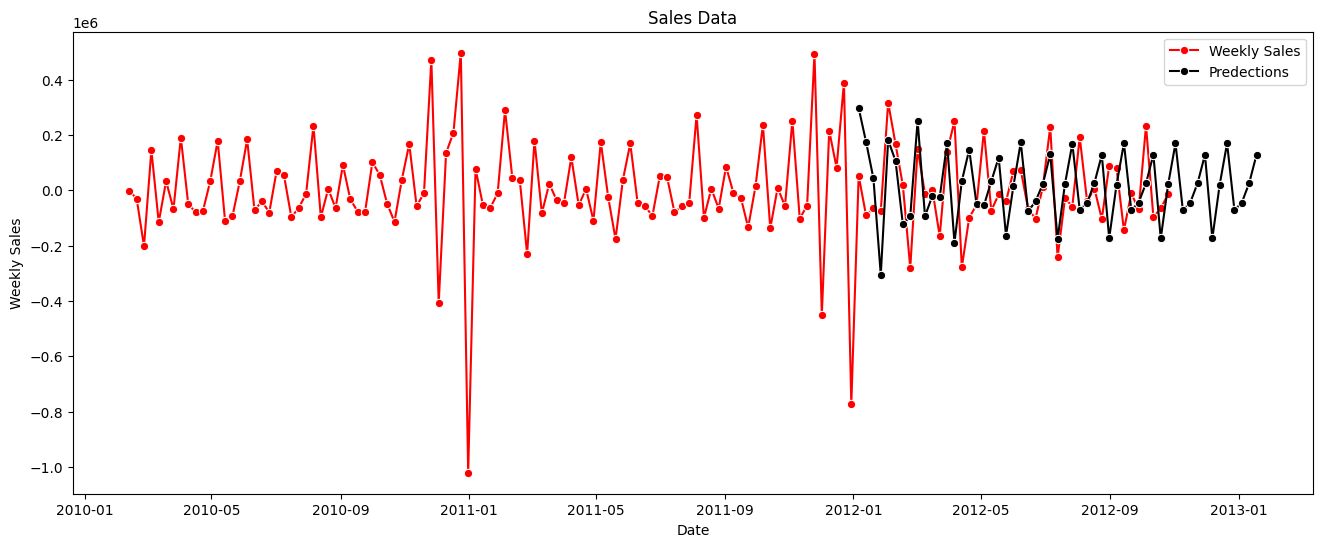

In [60]:
    plt.figure(figsize=(16,6))
    sns.lineplot(data = differenceing_trend, marker = 'o', color = 'red', label='Weekly Sales')
    sns.lineplot(data = forcast_sale, marker = 'o', color = 'black', label='Predections')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title('Sales Data')
    plt.show()